# Visualization Notebook
## Greg Placencia
## Adapted from https://github.com/kurtklingensmith/DataDistributions/tree/main

Two of the most common visualization libraries are:
- matplotlib - static, interactive and animated
- seaborn - static and based on matplotlib but slightly easier to use from the start

In addition, there are visualization tools that can be useful:
### Simple / Easier for beginners but may not be scalable
- Leather
- Pygal - simple interaction

- plotly - animated interactive graphics
- Bokeh -  interactive or publication quality
- Plotnine (ggplot) - general static
- Missingno - useful to display when there is missing data
- Vega - Altair (declarative approach) -t high quality data visualization ans professional loo (pat ofe course of work with Grammar of Graphic). Not well supported because it is newer. multiple with various types of  like ion, such as graphs, charts, inteetc whereoproach (i.e., you describe what you need and get the desired result in the form of a ready-made . Nely it will not be suitable fr
System and Network Abstraction:
-  beginne -ueasy to use to sed leary for creen

For web use:
- Gleam (interactive)

For Geographic Maps:
- Geoplotlib (interactive)s- Folium (interactive) - maps and other geographic data visualizations, but somewhat limited
- Pydeck (high interactive) - location-based 3D maps but resource intense
 library alone.


In [2]:
# Data Handling:
import pandas as pd
from pandas.api.types import CategoricalDtype

#Add seaborn to Python if needed
#%pip install seaborn

# Data Visualization Libraries:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import networkx as nx
import pydeck as pdk


from joypy import joyplot

# Display Configuration:
%config InlineBackend.figure_format='retina'

# Data
## Weather

In [32]:
# Load data:
df = pd.read_csv('weatherData.csv')

# Set season as a categorical data type:
season = CategoricalDtype(['Winter', 'Spring', 'Summer', 'Fall'])
df['Season'] = df['Season'].astype(season)

## UCI Students

In [35]:
# Install UCI Repo
#!pip install ucimlrepo

# Loading a dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets

# Gather X and Y for visualizations
df_uci = pd.concat([X,y], axis=1)

df_uci.head(3)

school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home  teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home    other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home    other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  

[3 rows x 33 columns]

In [5]:
print (df)

     Location  Season  Entry  Temp
0      City A  Spring      1  35.0
1      City B  Spring      1  35.0
2      City C  Spring      1  69.0
3      City A  Summer      1  78.0
4      City B  Summer      1  74.0
...       ...     ...    ...   ...
1195   City B    Fall    100  55.0
1196   City C    Fall    100  68.0
1197   City A  Winter    100  23.0
1198   City B  Winter    100  45.0
1199   City C  Winter    100  52.0

[1200 rows x 4 columns]


# Histogram

In [6]:
# Set plot size:
plt.figure(figsize=(10, 6))

# Generate histogram:
sns.histplot(df, x='Temp');

# Histograms by Distributions

In [7]:
# Set plot size:
plt.figure(figsize=(10, 6))

# Generate plot:
sns.histplot(df, x='Temp', hue='Location', multiple='stack')

# Set labels:
plt.title('Distribution of All Observed Temperatures', fontsize=25, y=1.03)
plt.xlabel('Temperature (F)', fontsize=13)
plt.ylabel('Count', fontsize=13);

# Histograms by Distributions by seasons

In [8]:
# Create Displot:
g = sns.displot(df, x='Temp', col='Season', hue='Location',
                multiple='stack', binwidth=5, height=6, col_wrap=2,
                facet_kws=dict(margin_titles=True))

# Set title:
g.fig.suptitle('Distributions of Temperature by Season',
               fontsize=25, x=0.47, y=1.03, ha='center')
g.set_axis_labels('Temperature (F)', 'Count')

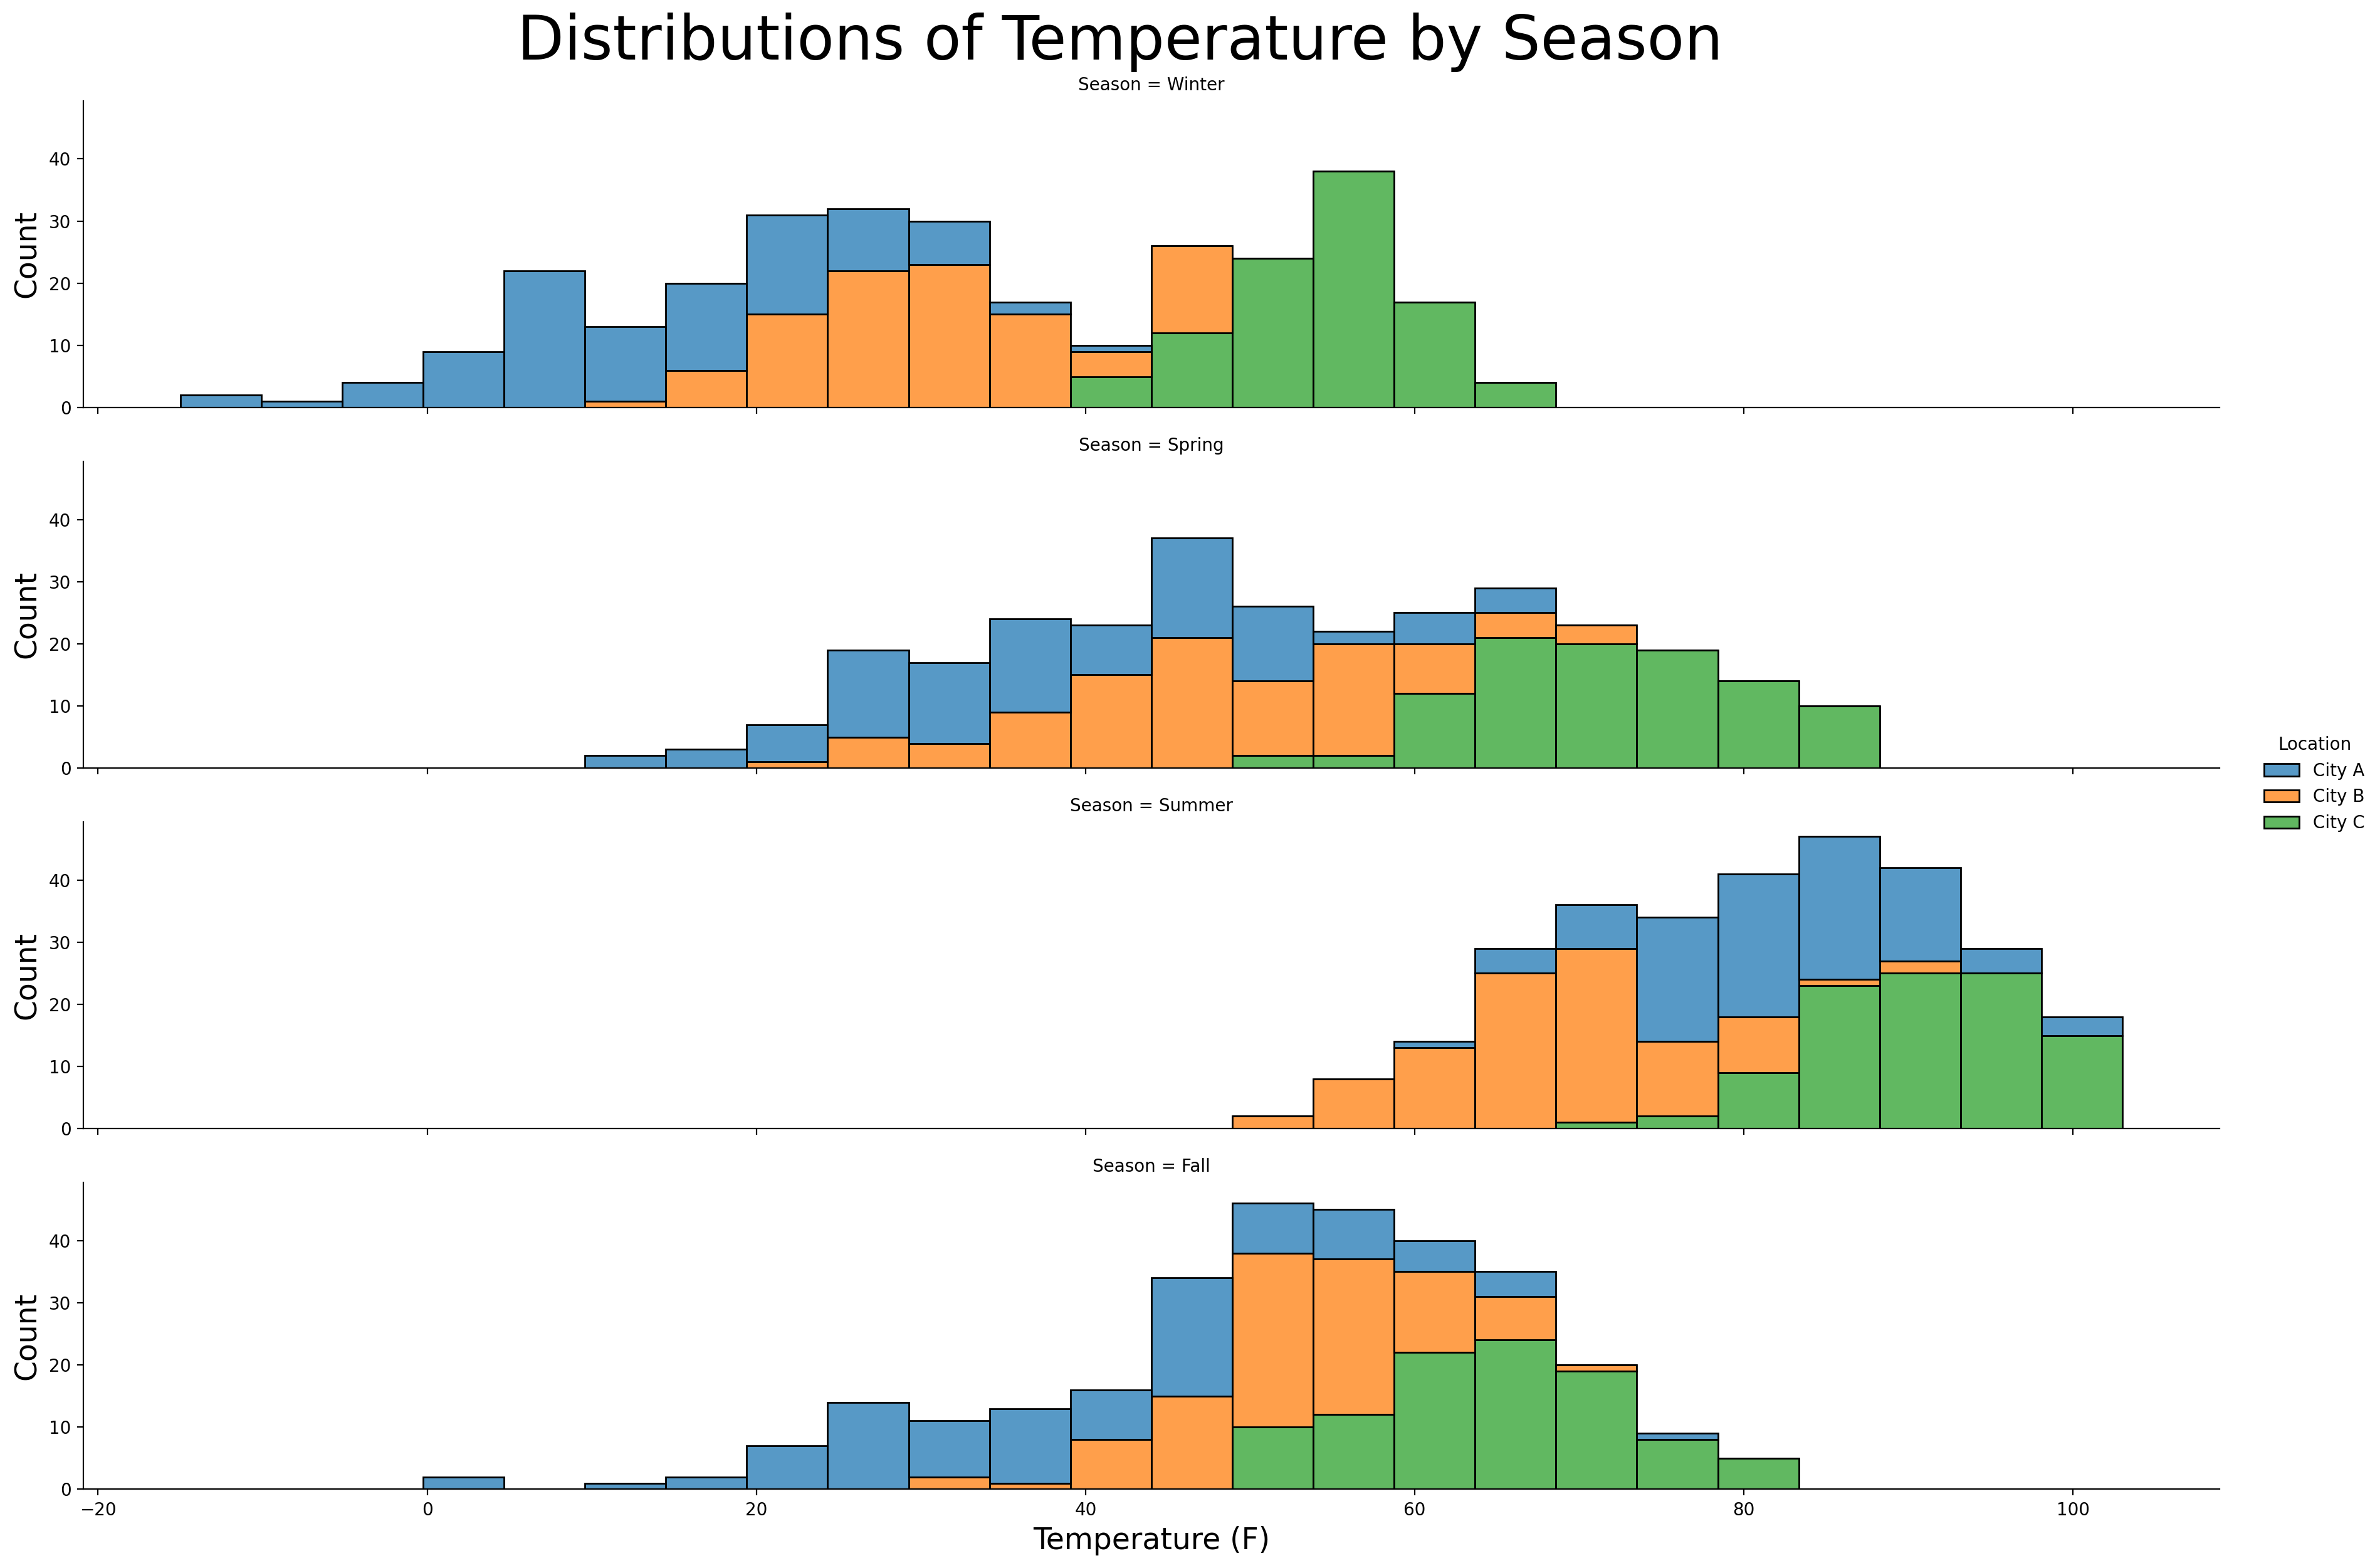

In [9]:
# Create Displot:
g = sns.displot(df, x='Temp', col='Season', hue='Location',
                multiple='stack', binwidth=5, height=3, aspect=6,
                col_wrap=1, facet_kws=dict(margin_titles=True))

# Set title:
g.fig.suptitle('Distributions of Temperature by Season',
               fontsize=35, x=0.47, y=1.03, ha='center')
g.set_axis_labels('Temperature (F)', 'Count', fontsize=17)

In [12]:
# Generate plot:
plot = px.histogram(df, x='Temp',
                    barmode='overlay', color='Location', facet_row='Season')

# Set titles:
plot.update_layout(title={'text': "Distributions of Temperature\
                                  <br><sup>Sorted by Season and \
                                  Location</sup>",
                          'xanchor': 'left',
                          'yanchor': 'top',
                          'x': 0.1}, legend_title_text='Location',
                   xaxis_title='Recorded Temperature (F)')
plot.for_each_annotation(lambda x: x.update(text=x.text.split("=")[1]))
plot.update_yaxes(title='Count')

# Set colors:
plot.update_layout(plot_bgcolor='white')
plot.update_xaxes(showline=True, linecolor='gray')
plot.update_yaxes(showline=True, linecolor='gray')

plot.show()

# KDE Plot

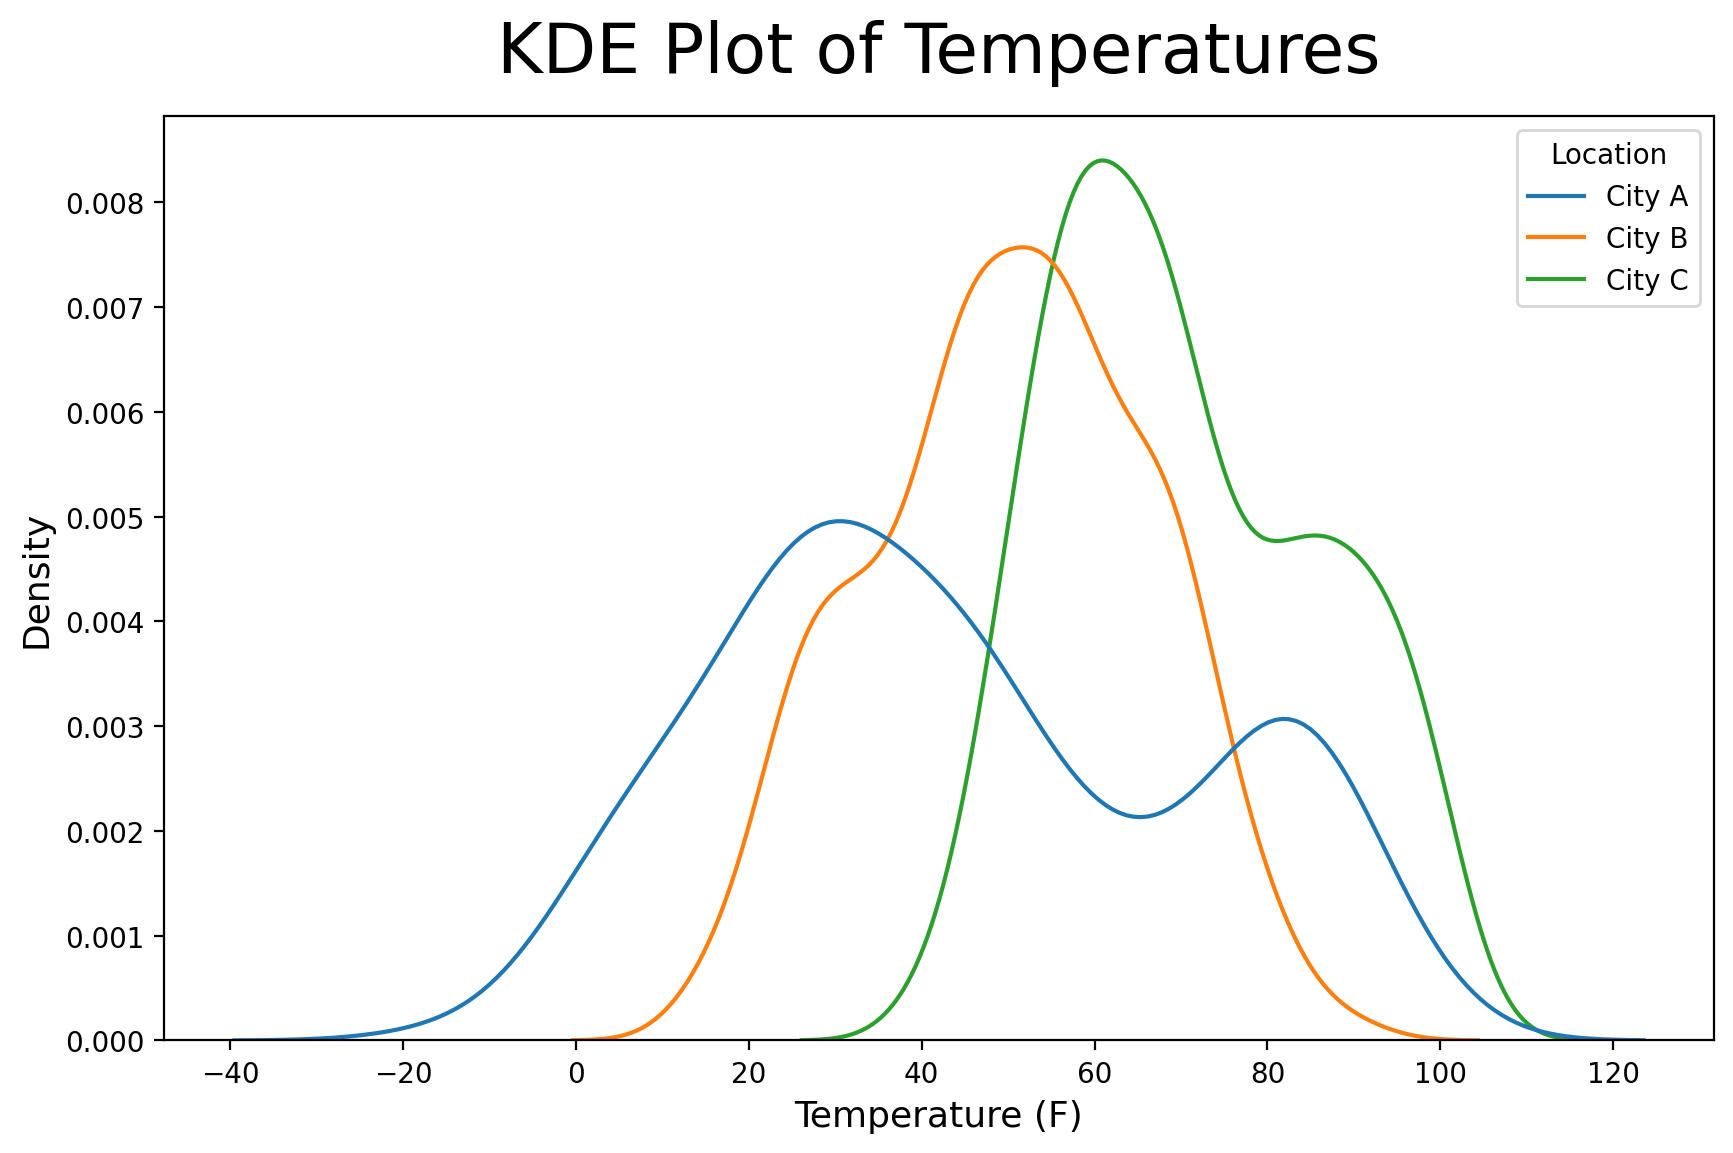

In [13]:
# Set plot size:
plt.figure(figsize=(10, 6))

# Generate KDE plot:
sns.kdeplot(data=df, x='Temp', hue='Location', fill=False)

# Set labels:
plt.title('KDE Plot of Temperatures', fontsize=25, y=1.03)
plt.xlabel('Temperature (F)', fontsize=13)
plt.ylabel('Density', fontsize=13);

# KDE Plot by Season

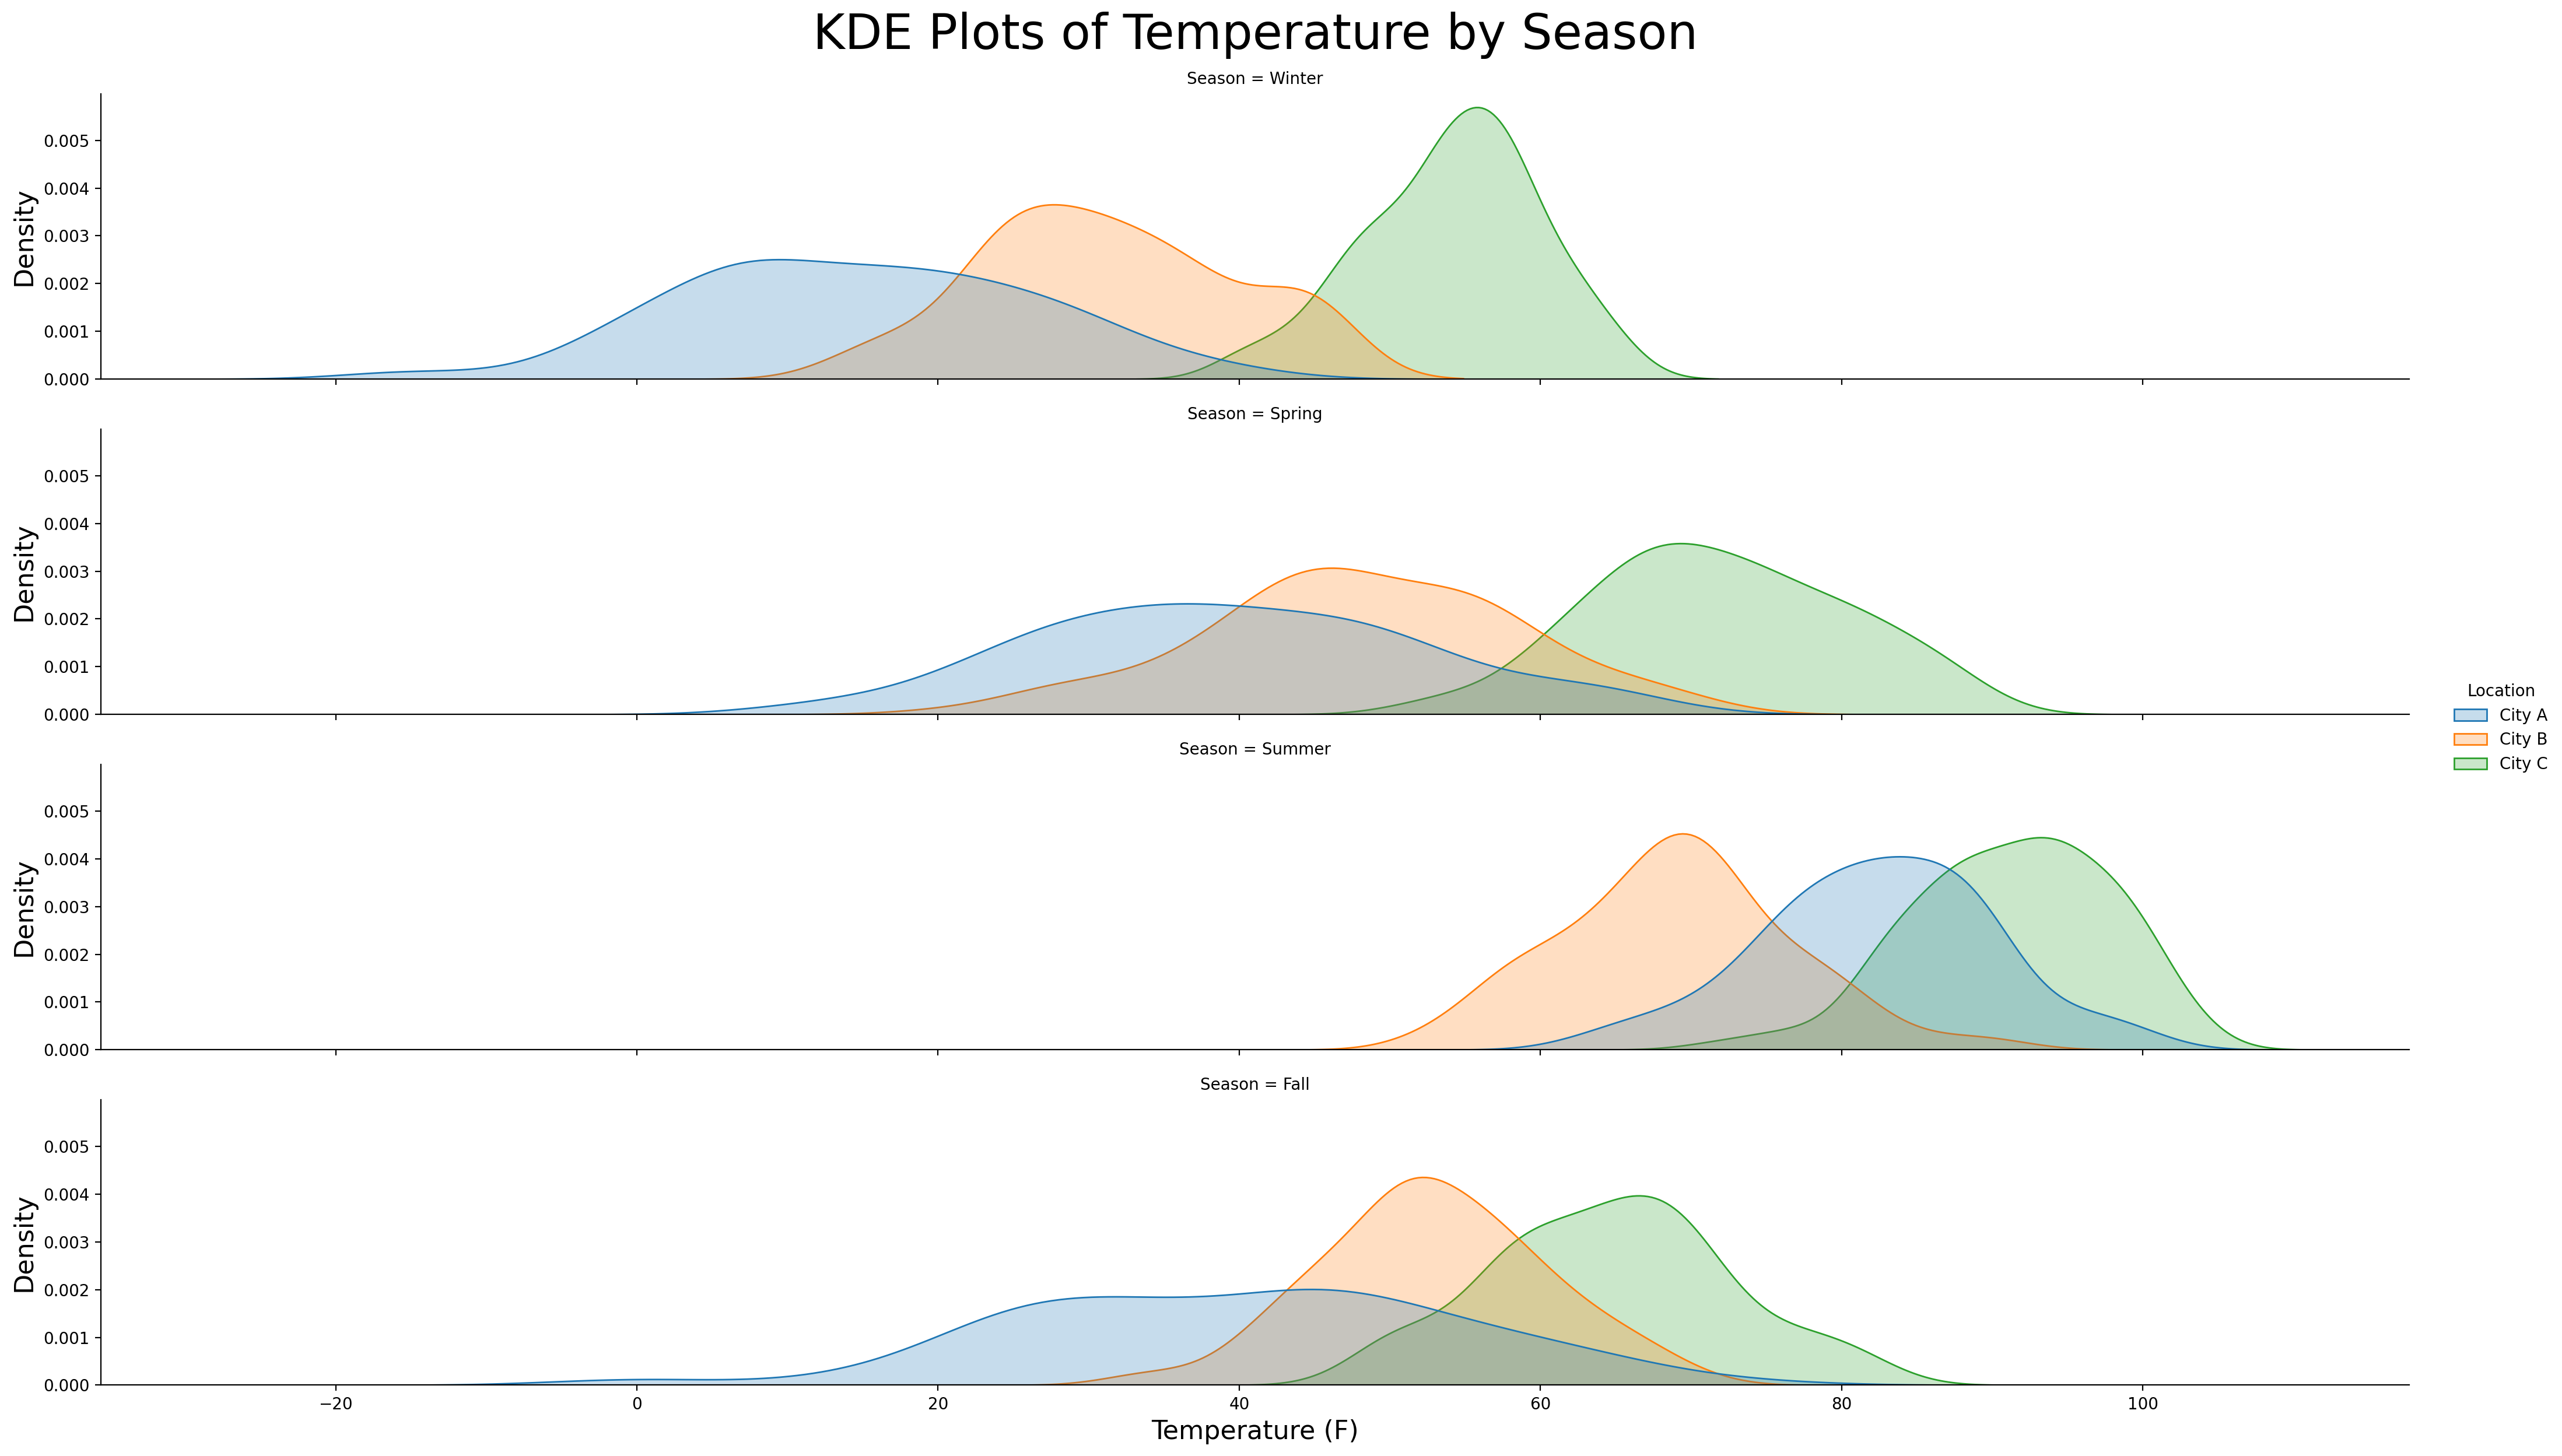

In [14]:
# Create Displot:
g = sns.displot(df, x="Temp", col="Season", hue='Location',
                kind='kde', height=3, aspect=7, col_wrap=1,
                fill=True, facet_kws=dict(margin_titles=True))

# Set title:
g.fig.suptitle('KDE Plots of Temperature by Season',
               fontsize=30, x=0.49, y=1.03, ha='center')
g.set_axis_labels('Temperature (F)', 'Density', fontsize=16);

# Restructure Data

In [15]:
# Structure the data:
dfJoy = df.pivot(index=['Entry', 'Season'], columns='Location', values='Temp')

dfJoy.head()

Location      City A  City B  City C
Entry Season                        
1     Winter    16.0    45.0    54.0
      Spring    35.0    35.0    69.0
      Summer    78.0    74.0    72.0
      Fall      46.0    66.0    63.0
2     Winter    29.0    36.0    46.0

# Joy Plot

C:\Users\gvplacencia\AppData\Local\anaconda3\envs\Visualization\Lib\site-packages\joypy\joyplot.py:176: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Text(0.5, 36.72222222222221, 'Temperature (F)')

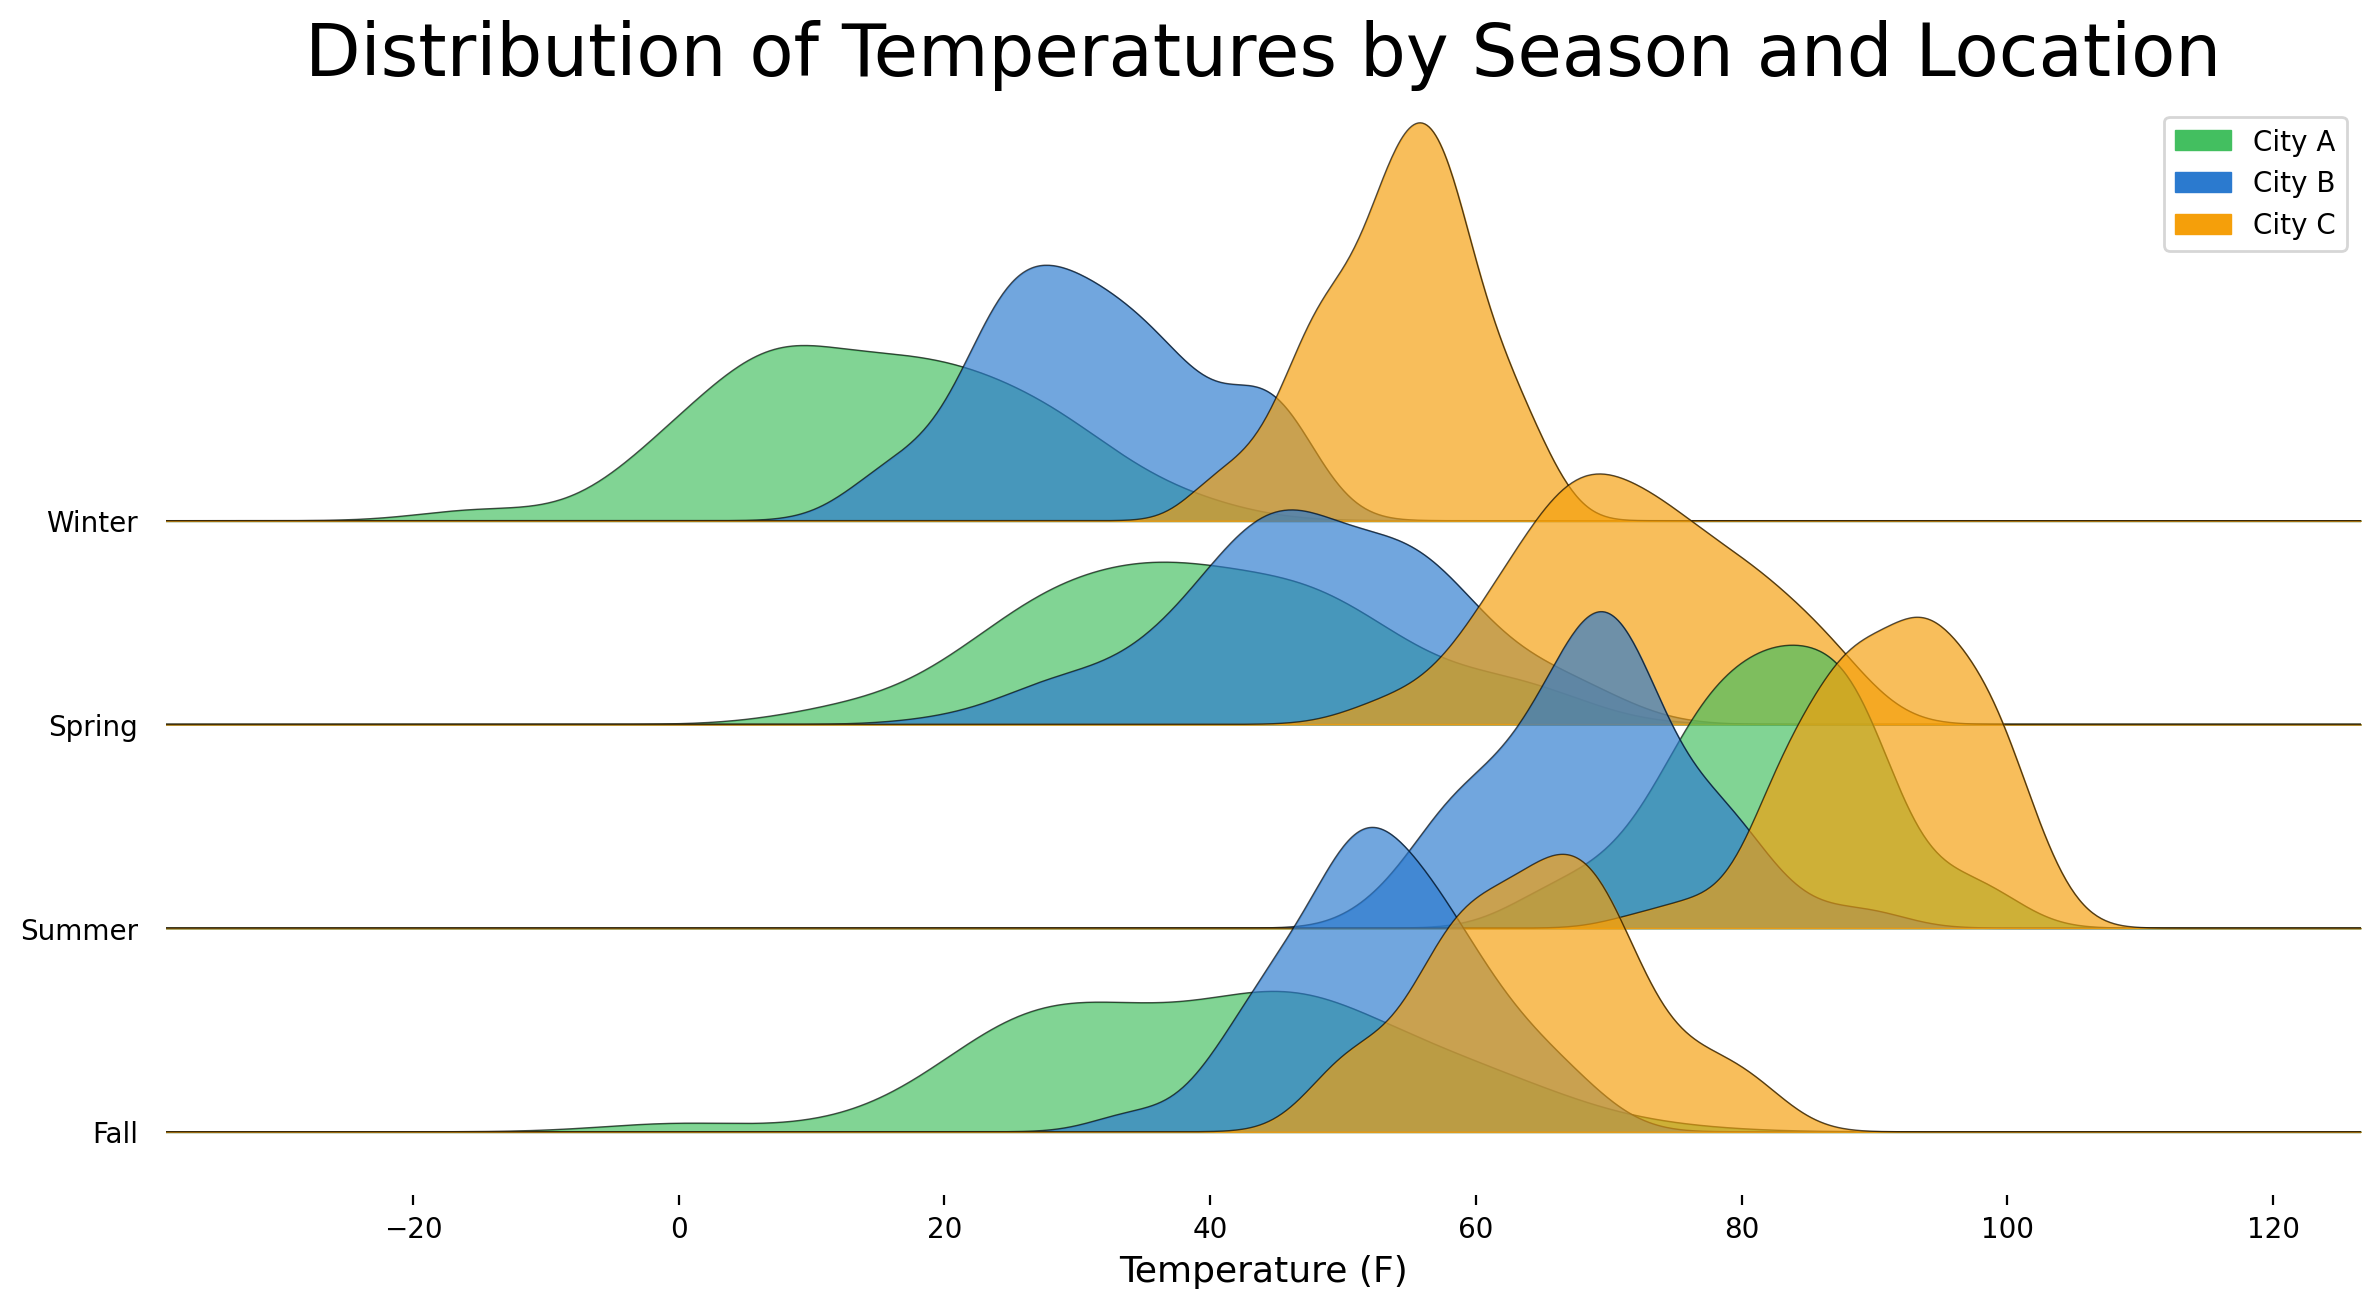

In [20]:
# Create JoyPlot / RidgePlot:
fig, axes = joyplot(data=dfJoy,
                    by='Season',
                    column=['City A', 'City B', 'City C'],
                    color=['#43bf60', '#2b7acf', '#f59f0a'],
                    alpha=.67,
                    legend=True,
                    overlap=2,
                    linewidth=.5,
                    figsize=(12, 6))

# Set Labels
plt.title('Distribution of Temperatures by Season and Location',
          fontsize=26, y=1.01)
plt.xlabel('Temperature (F)', fontsize=13)

# Box Plots

In [21]:
# Generate plot:
plot = px.box(df, x='Season', color='Location', y='Temp', 
              color_discrete_sequence=px.colors.cyclical.IceFire)

# Update layout and titles:
plot.update_layout(title={'text': "Seasonal Temperature Distributions\
                                  <br><sup>By Season for Cities A, B, \
                                  and C</sup>",
                          'xanchor': 'left',
                          'yanchor': 'top',
                          'x': 0.1}, legend_title_text='Location:',
                   xaxis_title='',
                   yaxis_title='Temperature (F)')

# Update style:
plot.update_layout(plot_bgcolor = 'white')
plot.update_xaxes(showline=True, linecolor='gray')
plot.update_yaxes(showline=True, linecolor='gray')

plot.show()

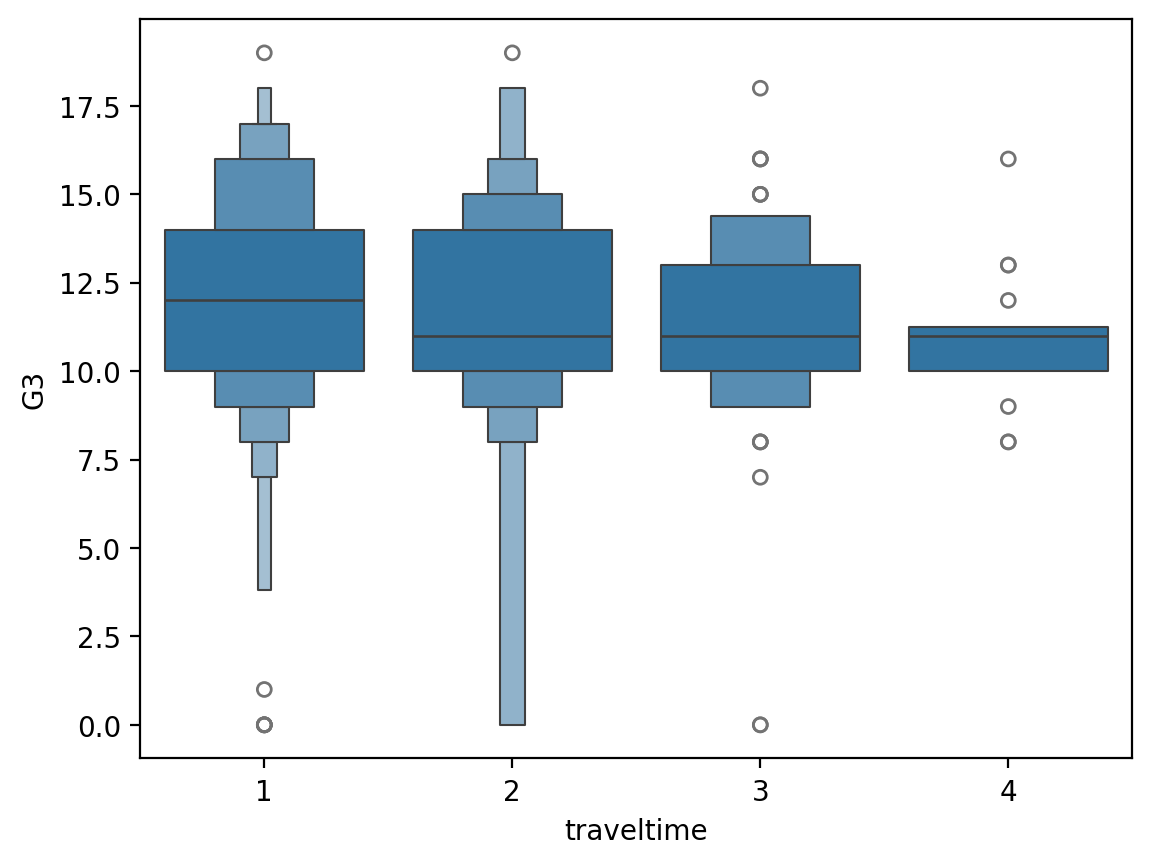

In [42]:
# BoxenPlot
sns.boxenplot(data=df_uci, x= 'traveltime' , y='G3');

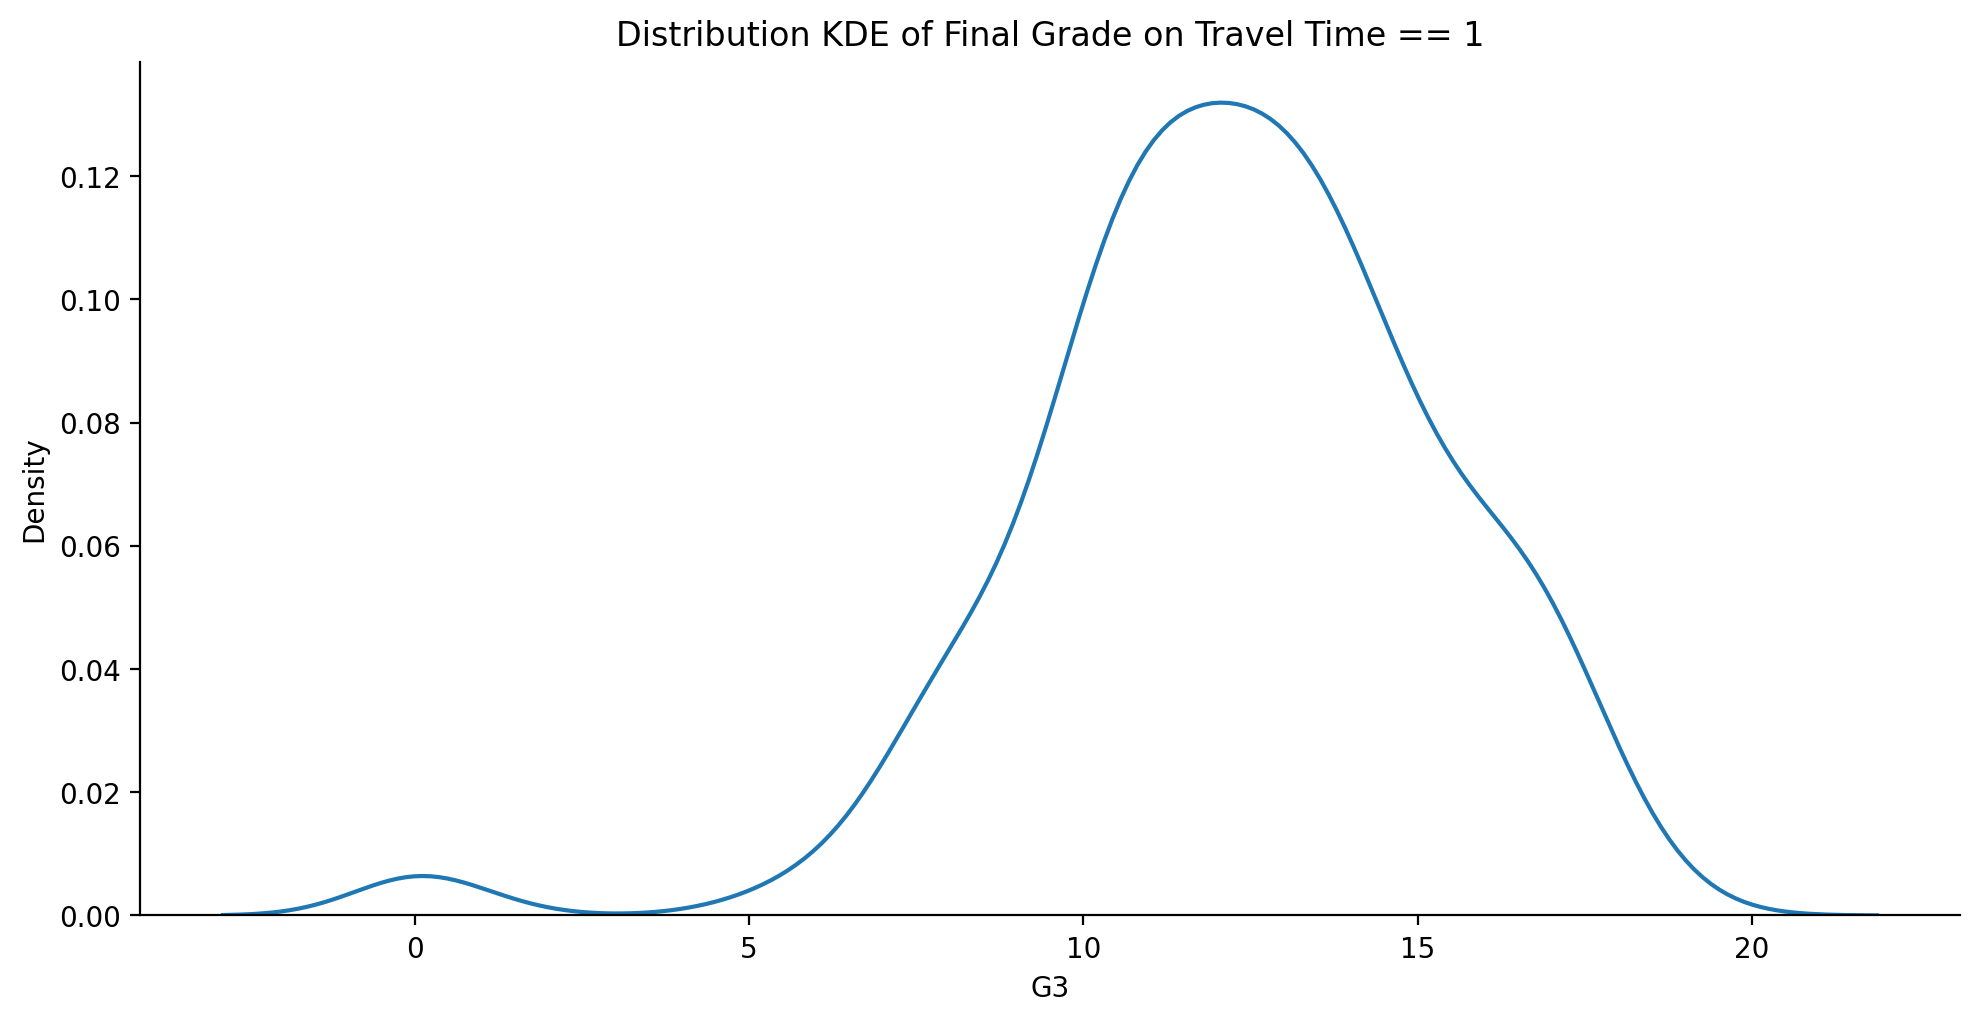

In [44]:
sns.displot(df_uci.query('traveltime == 1'),
              x='G3', kind='kde', aspect=2)
plt.title('Distribution KDE of Final Grade on Travel Time == 1');

# Violin Plots

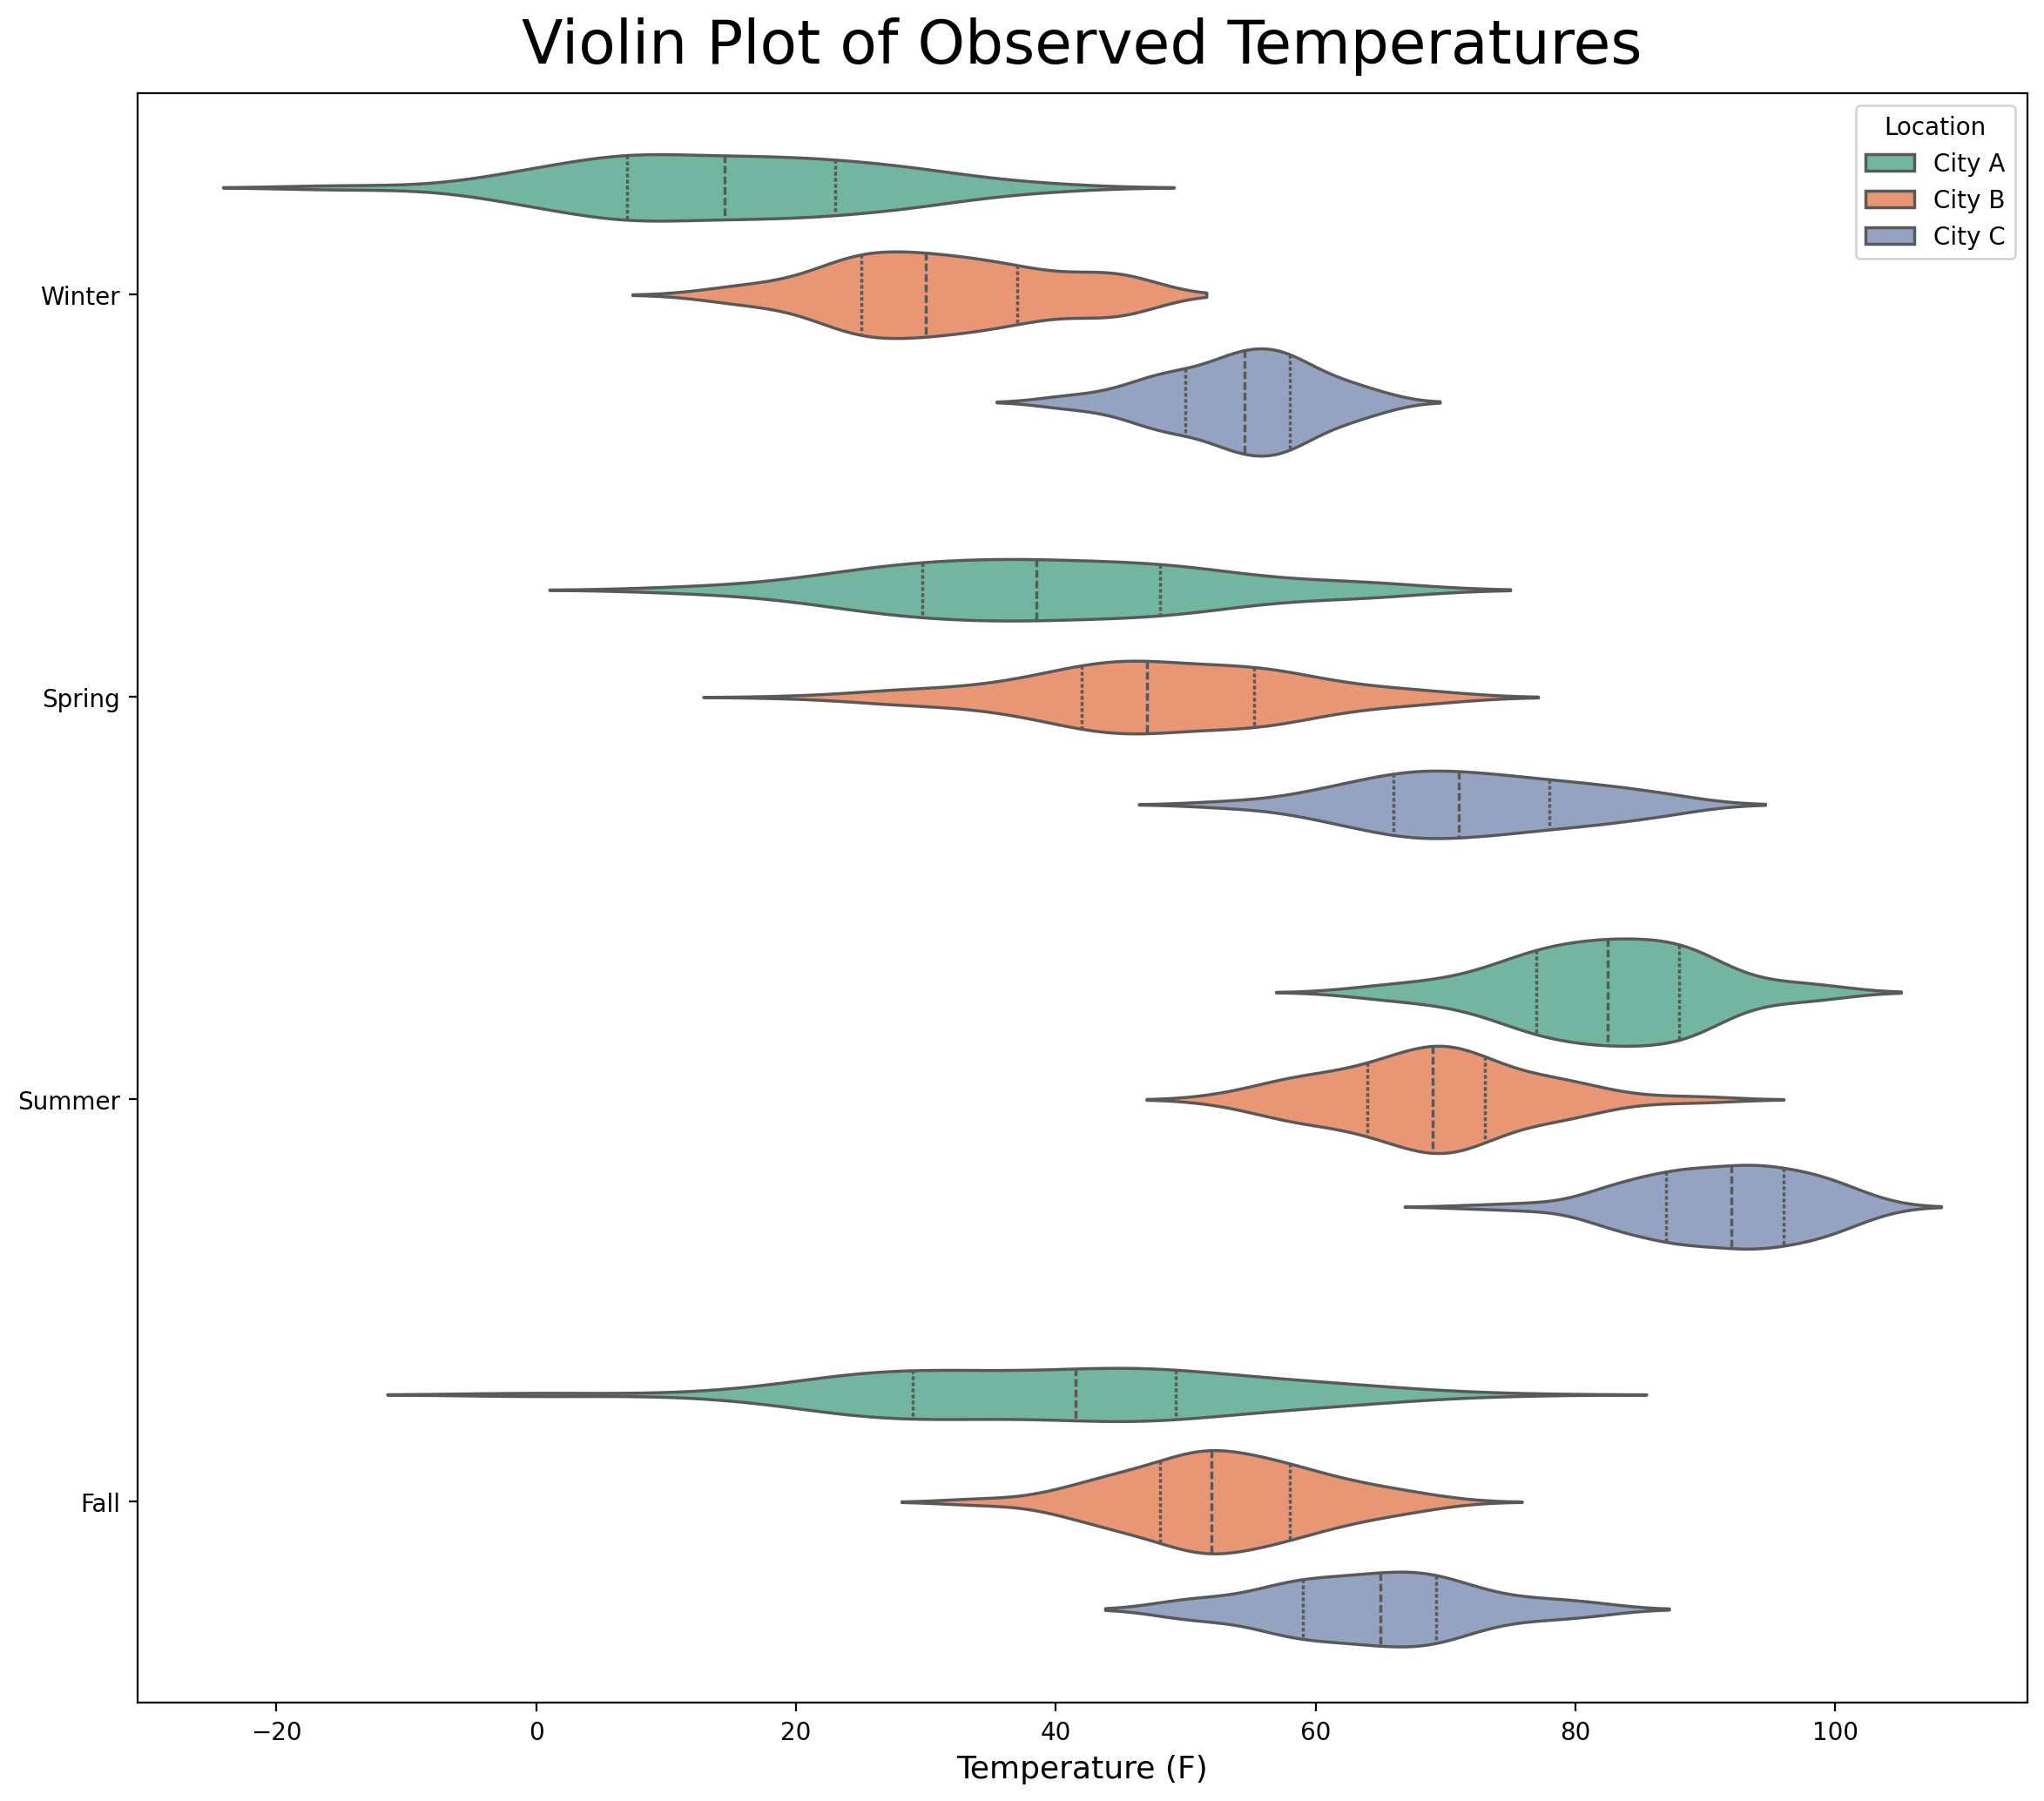

In [22]:
# Set plot size:
plt.figure(figsize=(14, 12))

# Generate violin plot:
sns.violinplot(data=df, x='Temp', y='Season', hue='Location',
               inner='quartile', palette='Set2')

# Set labels:
plt.title('Violin Plot of Observed Temperatures', fontsize=25, y=1.01)
plt.xlabel('Temperature (F)', fontsize=13)
plt.ylabel('');

# Strip and Swarm Plots

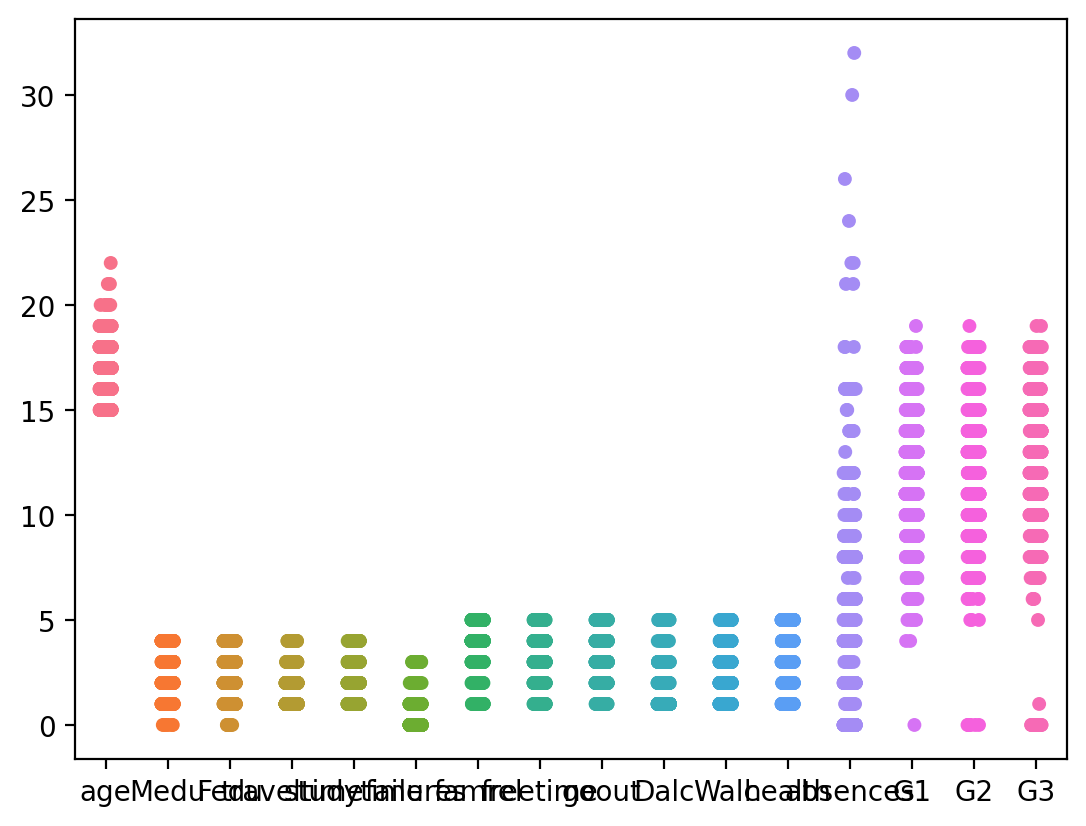

In [36]:
# Plot
sns.stripplot(data=df_uci);

In [38]:
sns.stripplot(data=df_uci, x='failures', y='G3', hue='school', dodge=True);

In [23]:
# Set plot size:
plt.figure(figsize=(14, 8))

# Generate strip plot:
sns.stripplot(data=df, x='Temp', y='Season', hue='Location', jitter=True, 
              palette="magma", alpha=.75)

# Set labels:
plt.title('Strip Plot of Observed Temperatures', fontsize=25, y=1.01)
plt.xlabel('Temperature (F)', fontsize=13)
plt.ylabel('');

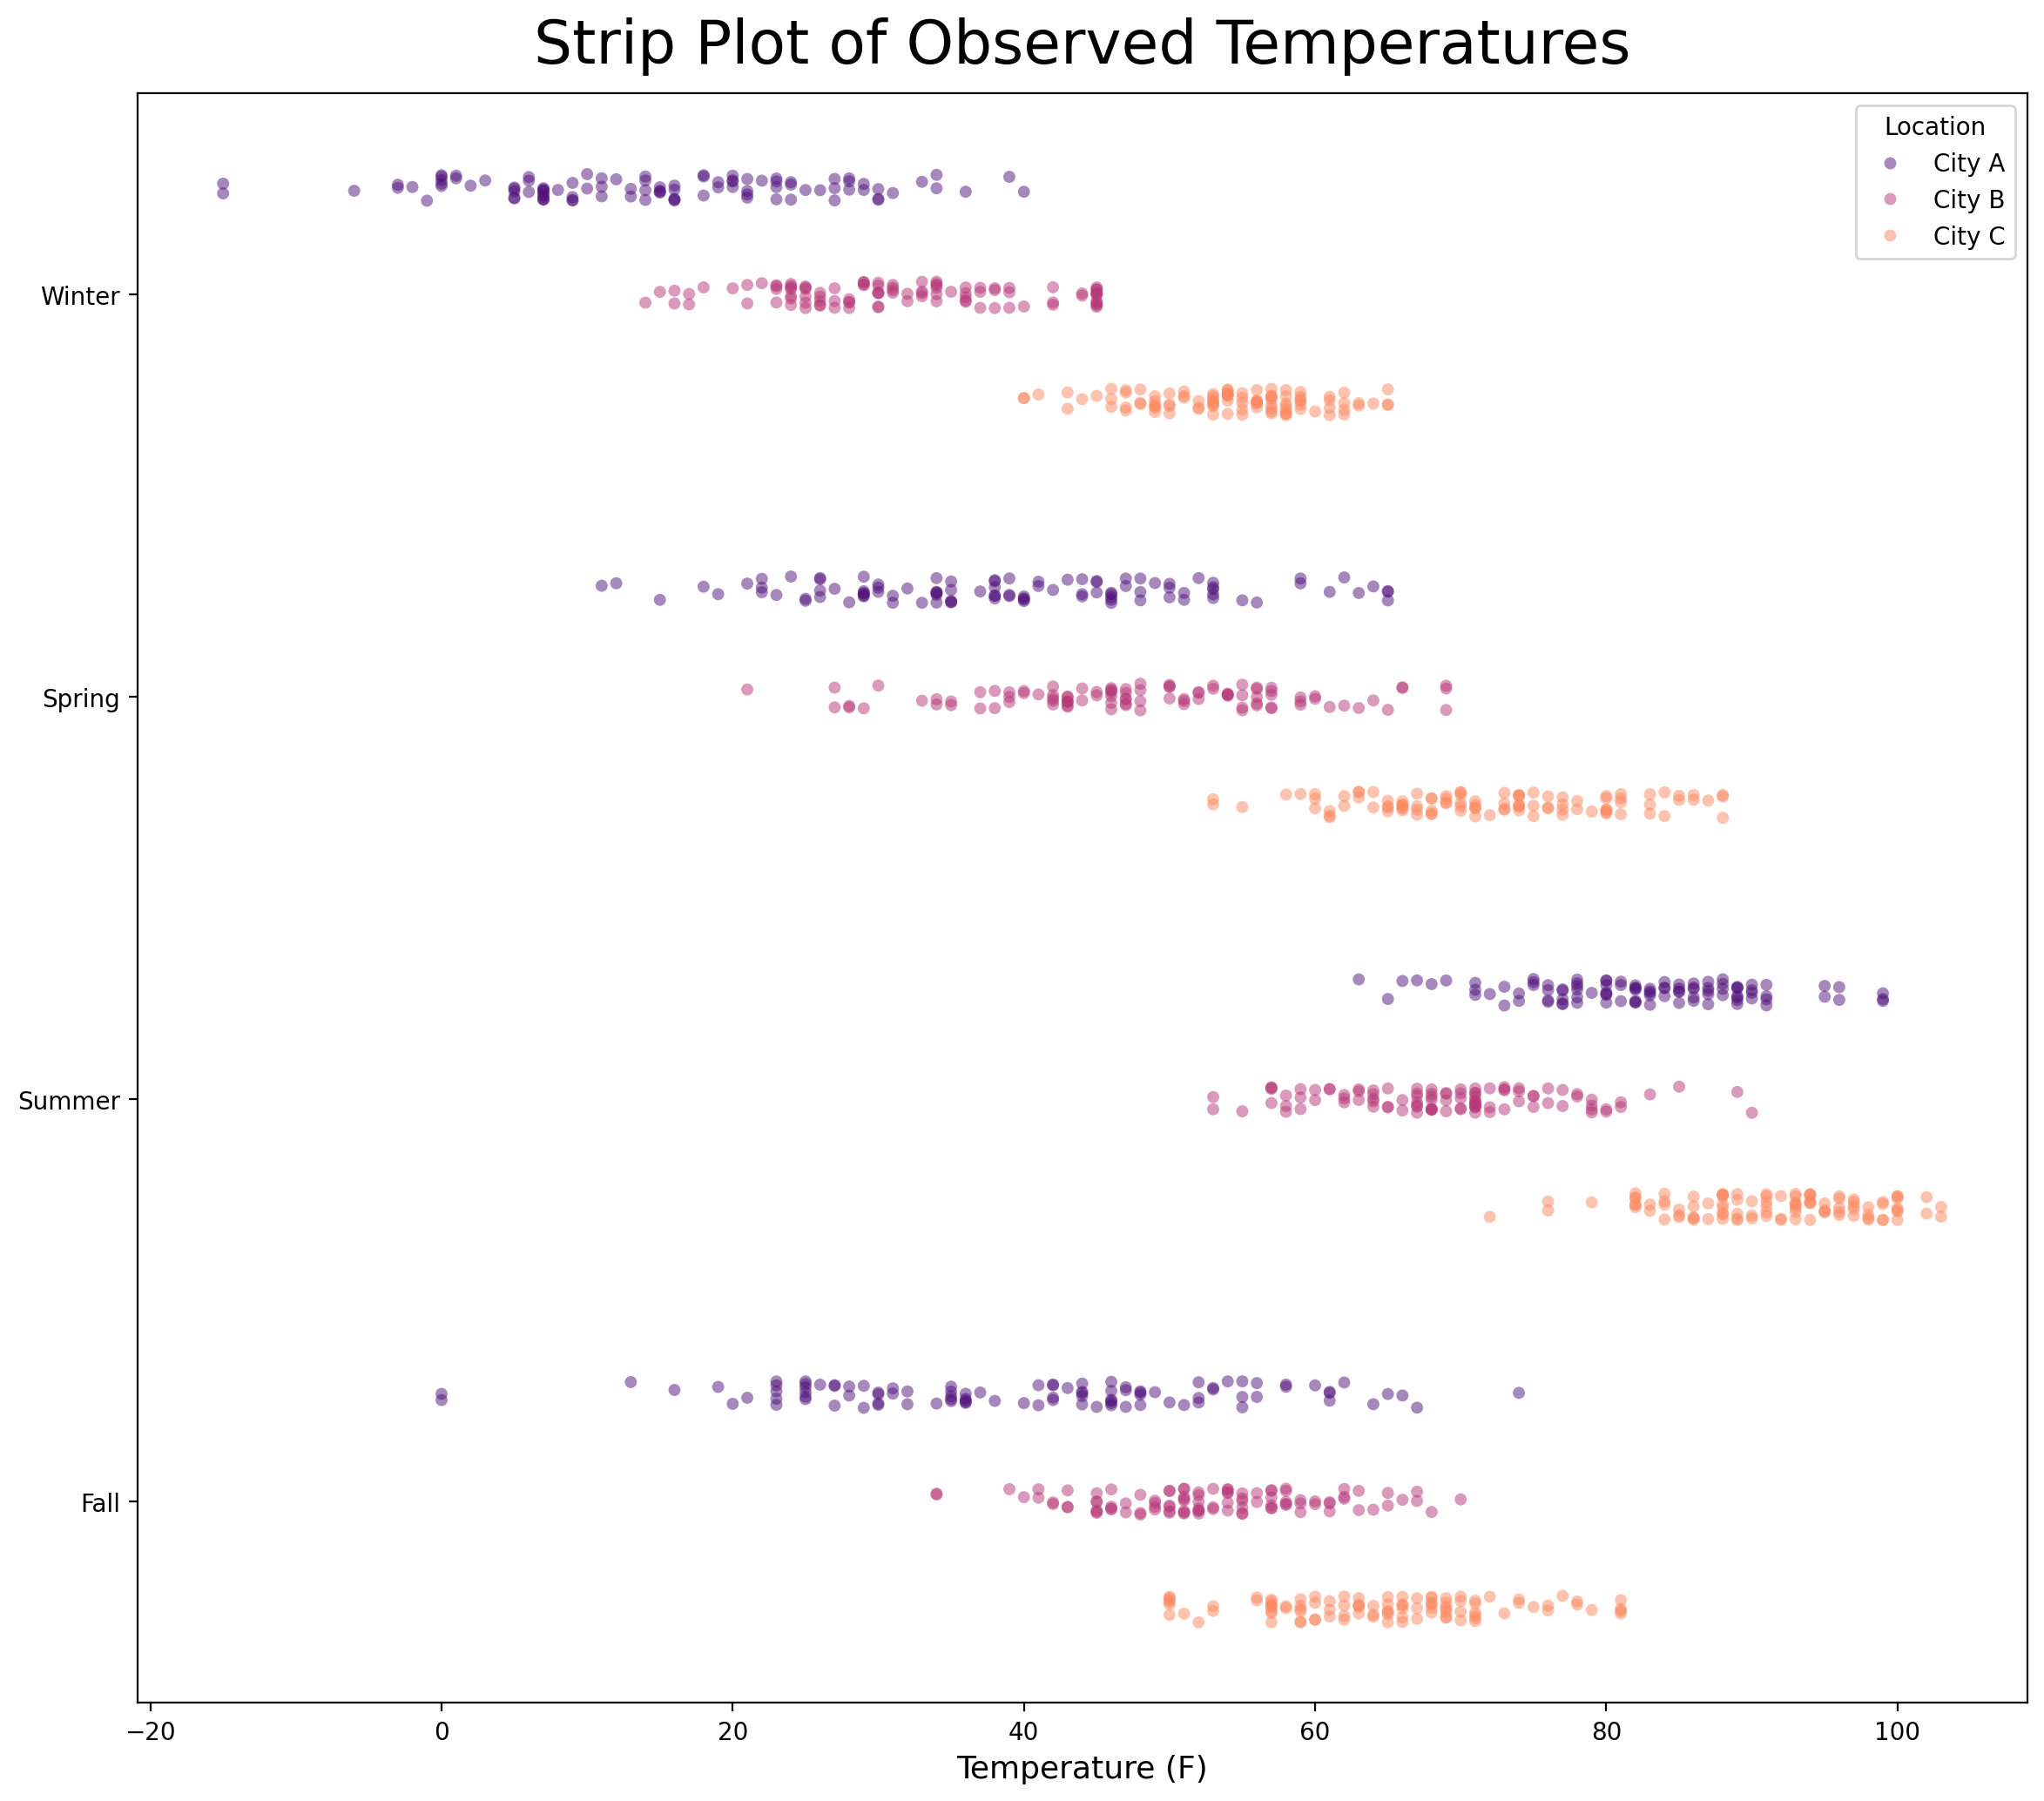

In [24]:
# Set plot size:
plt.figure(figsize=(14, 12))

# Generate strip plot:
sns.stripplot(data=df, x='Temp', y='Season', hue='Location', jitter=True, 
              palette="magma", dodge=True, alpha=.5)

# Set labels:
plt.title('Strip Plot of Observed Temperatures', fontsize=25, y=1.01)
plt.xlabel('Temperature (F)', fontsize=13)
plt.ylabel('');

# Swarm Plot

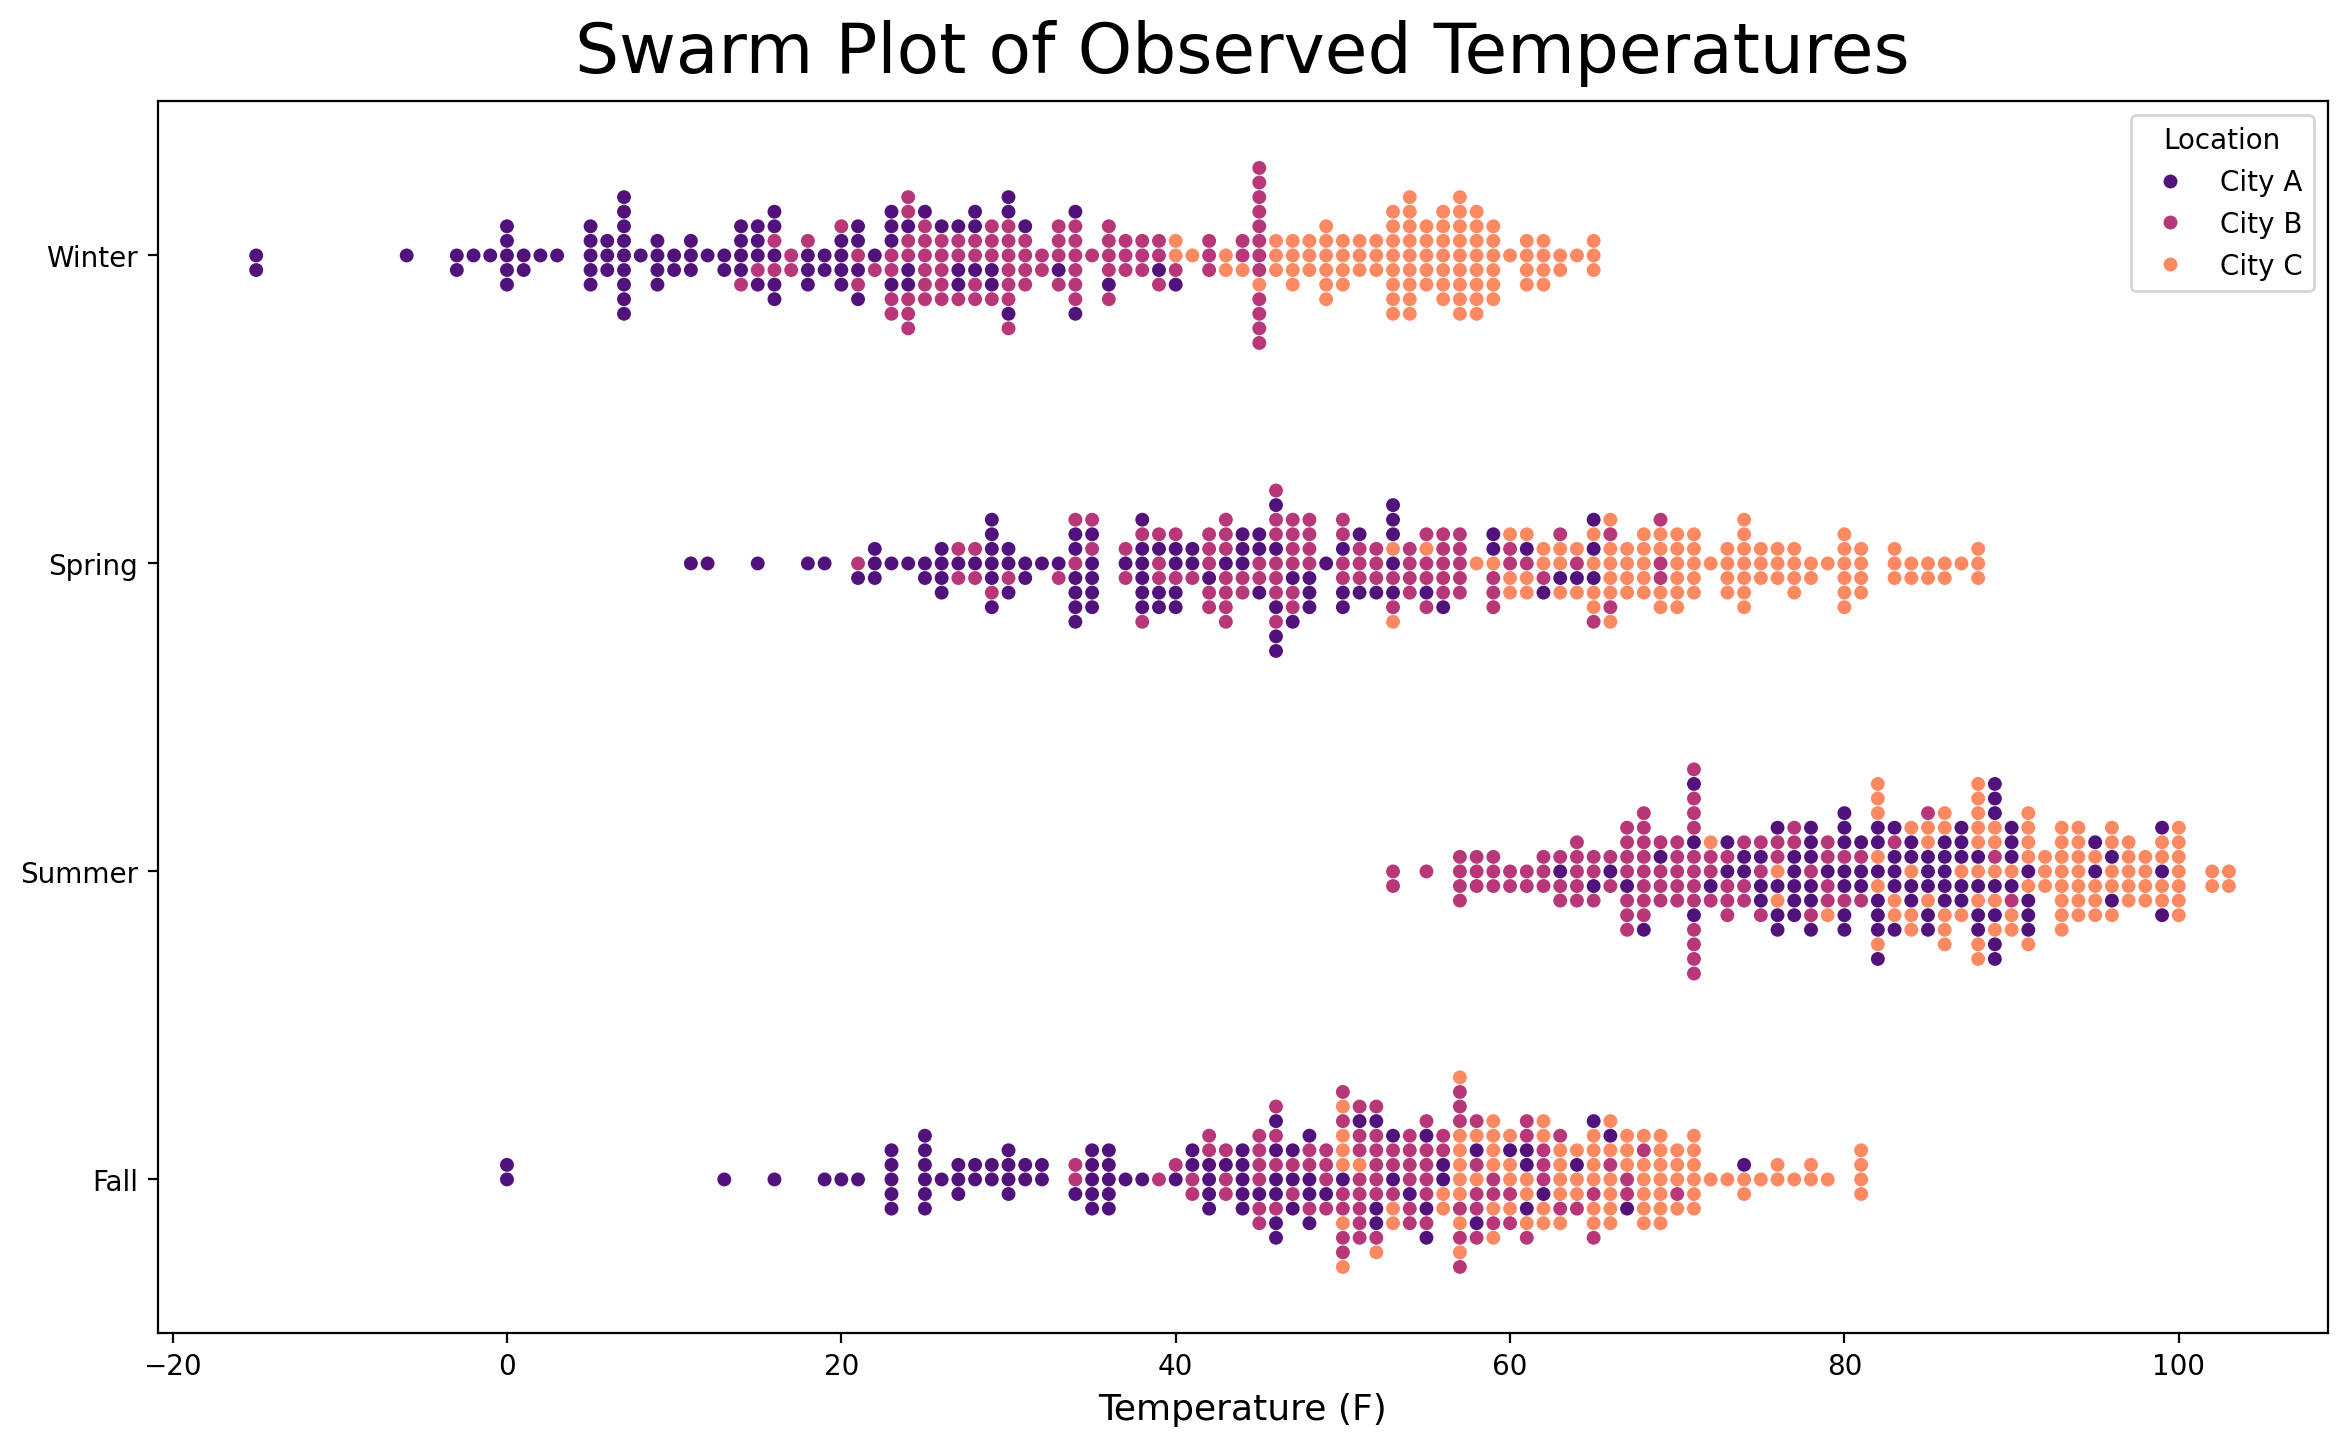

In [25]:
# Set plot size:
plt.figure(figsize=(14, 8))

# Generate swarm plot:
sns.swarmplot(data=df, x='Temp', y='Season', hue='Location', 
              palette='magma')

# Set labels:
plt.title('Swarm Plot of Observed Temperatures', fontsize=25, y=1.01)
plt.xlabel('Temperature (F)', fontsize=13)
plt.ylabel('');

# ECDF Plot

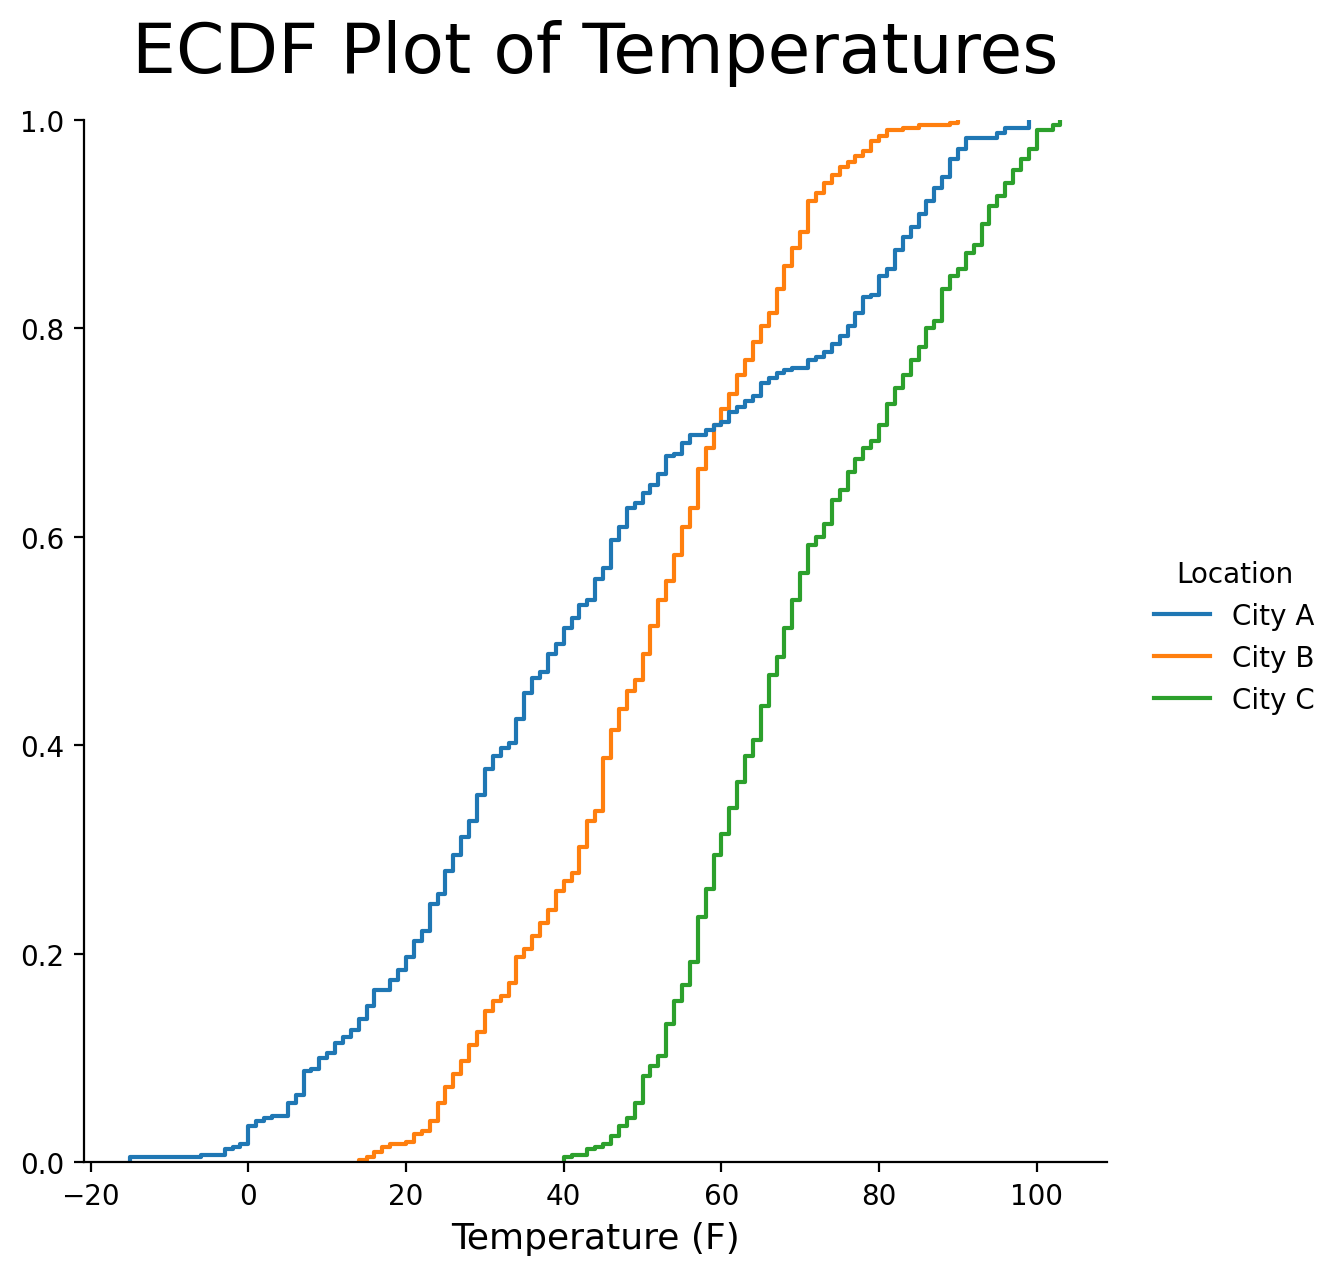

In [26]:
# Generate plot:
sns.displot(df, x='Temp', hue='Location', kind='ecdf', height=6)

# Set labels:
plt.title('ECDF Plot of Temperatures', fontsize=25, y=1.03)
plt.xlabel('Temperature (F)', fontsize=13)
plt.ylabel('');

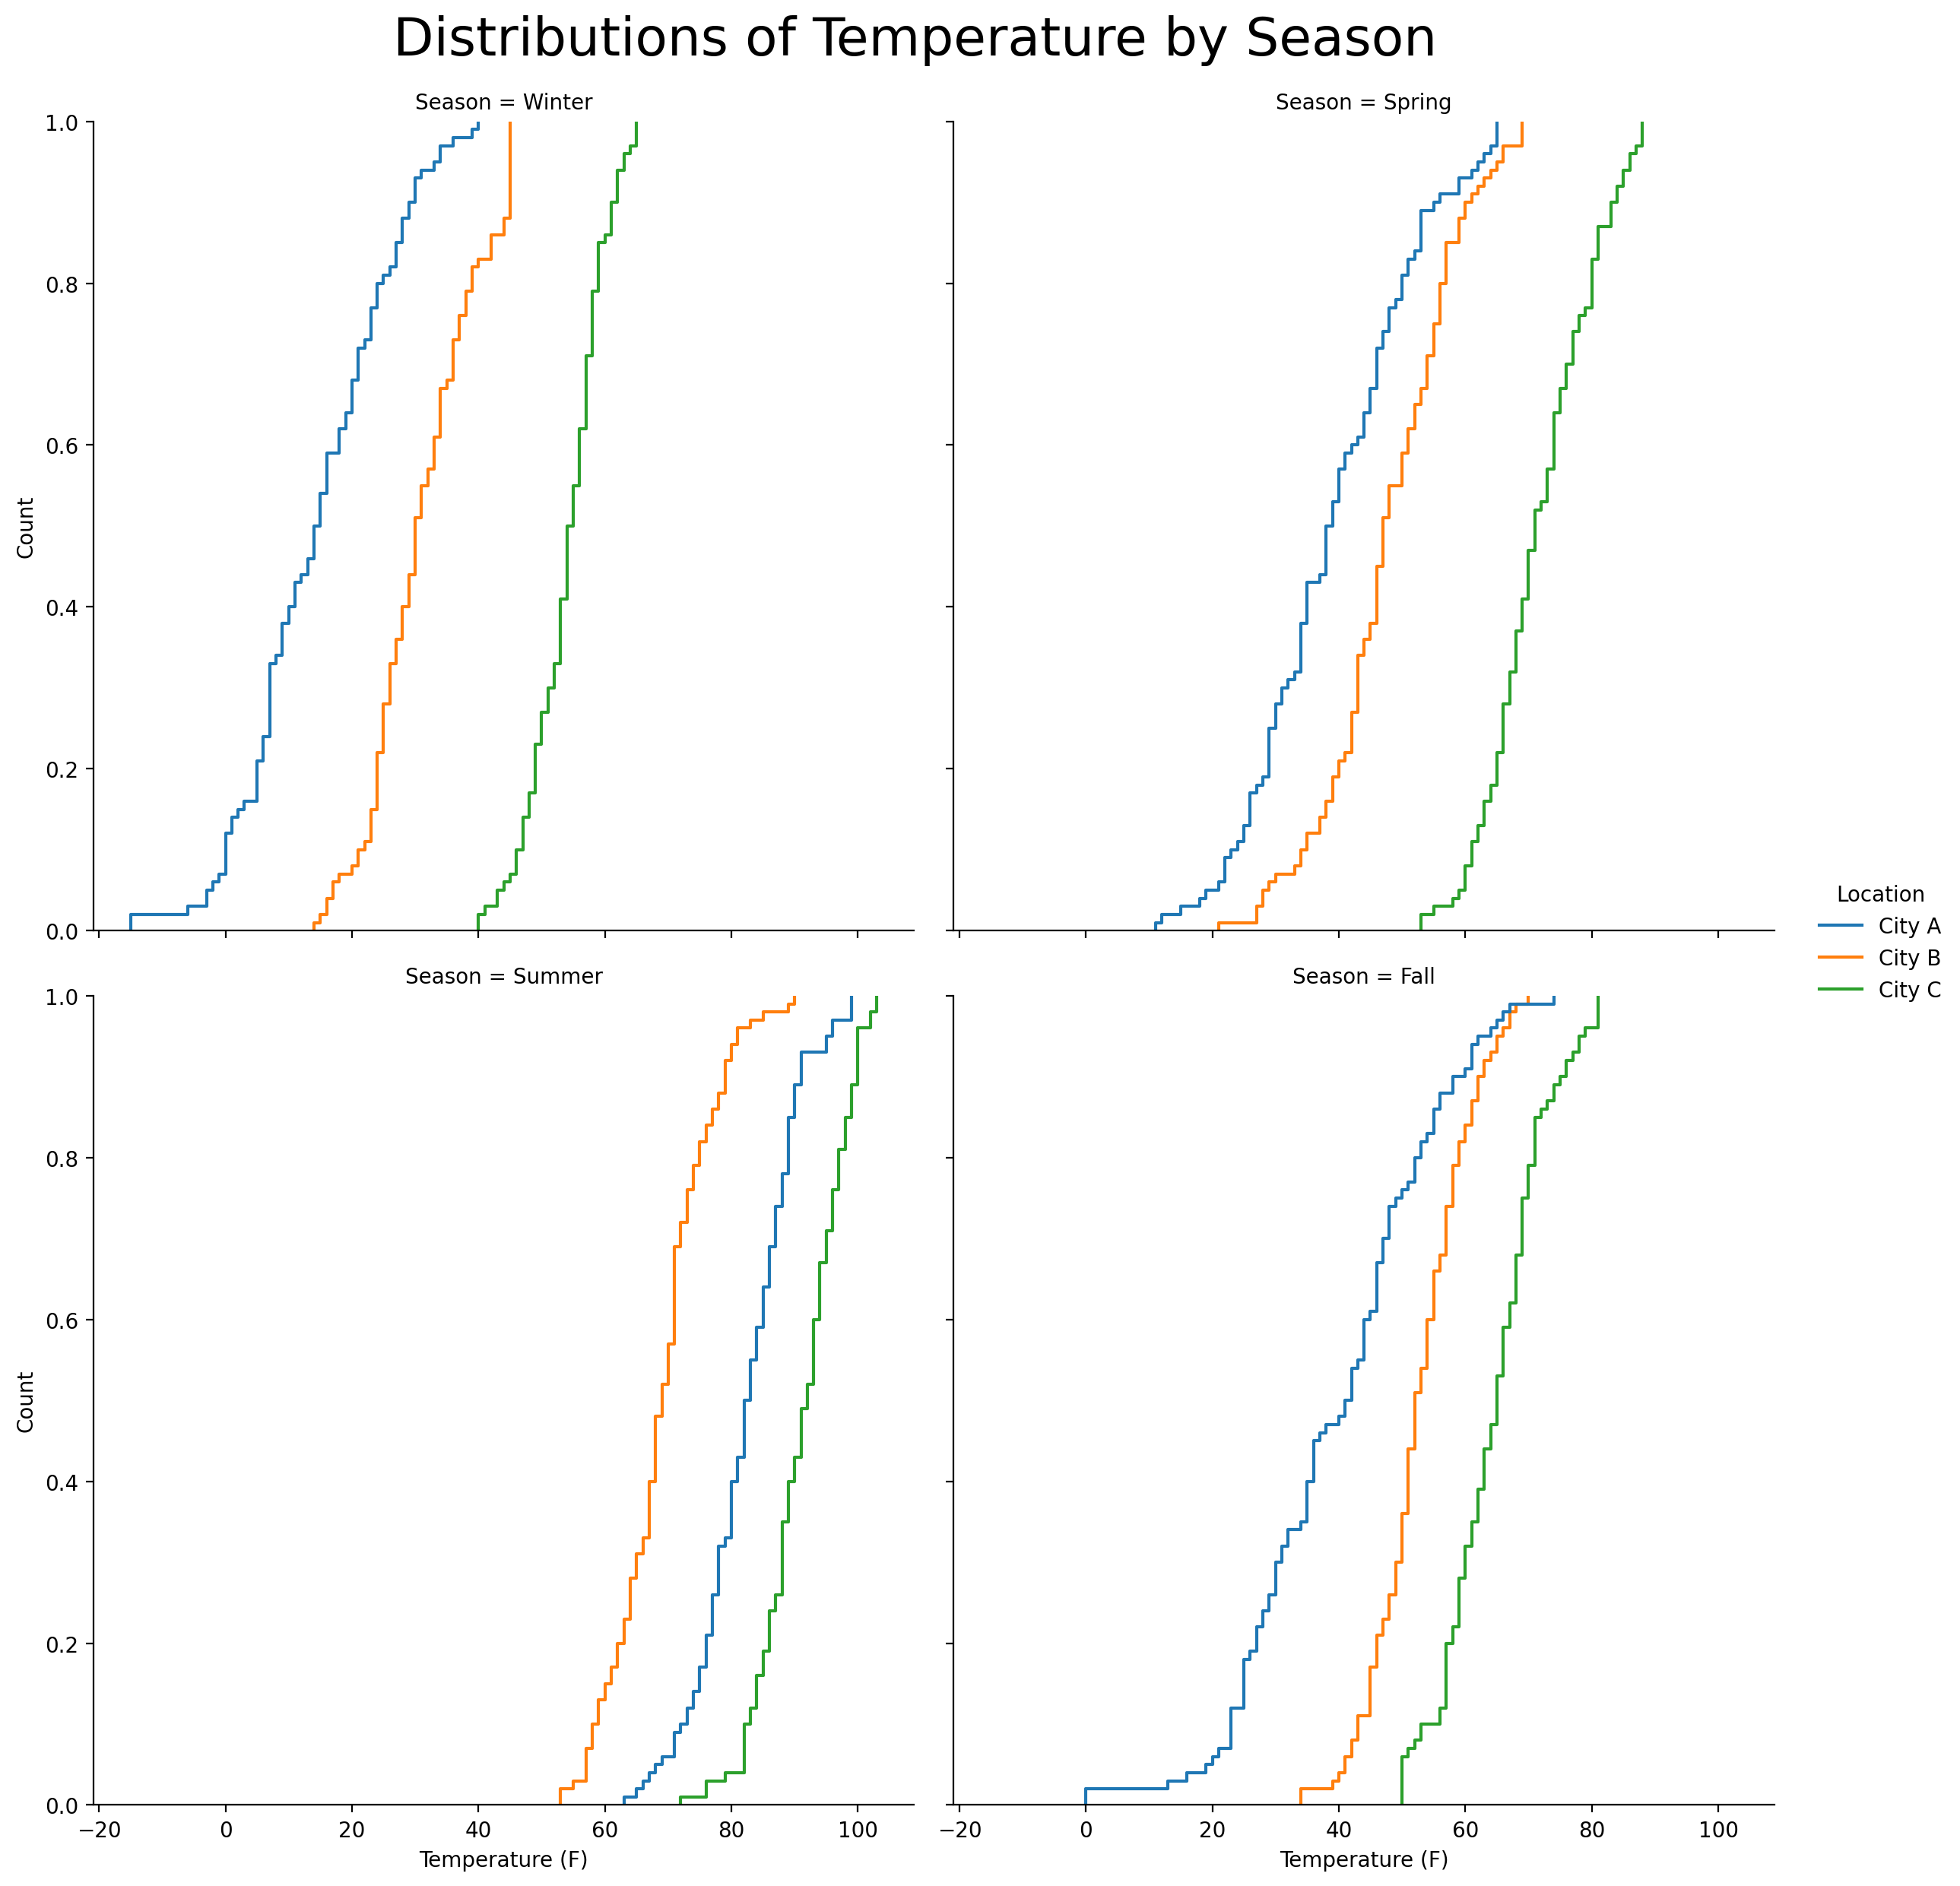

In [27]:
# Create Displot:
g = sns.displot(df, x='Temp', col='Season', hue='Location',
                kind='ecdf', height=6, col_wrap=2,
                facet_kws=dict(margin_titles=True))

# Set labels:
g.fig.suptitle('Distributions of Temperature by Season',
               fontsize=25, x=0.47, y=1.03, ha='center')
g.set_axis_labels('Temperature (F)', 'Count');

# Catplot

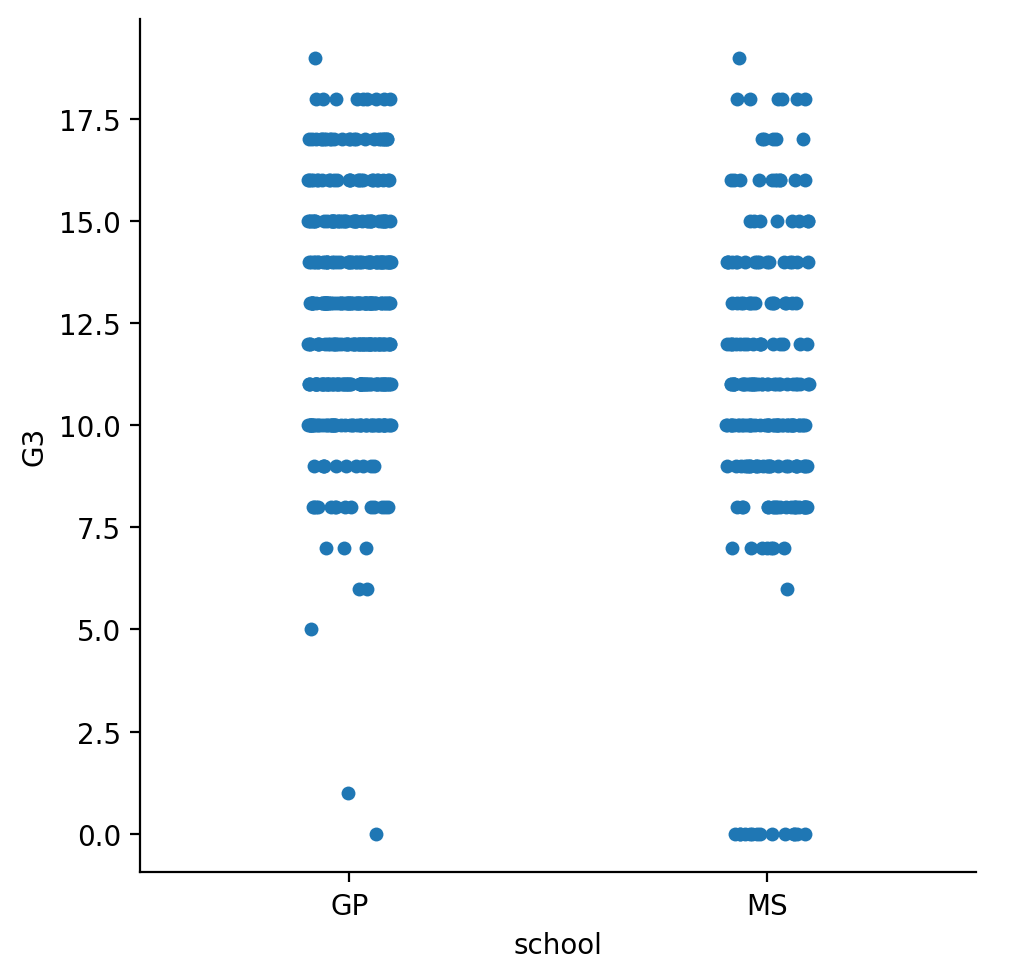

In [40]:
#CatPlot
sns.catplot(data=df_uci, x='school', y='G3');

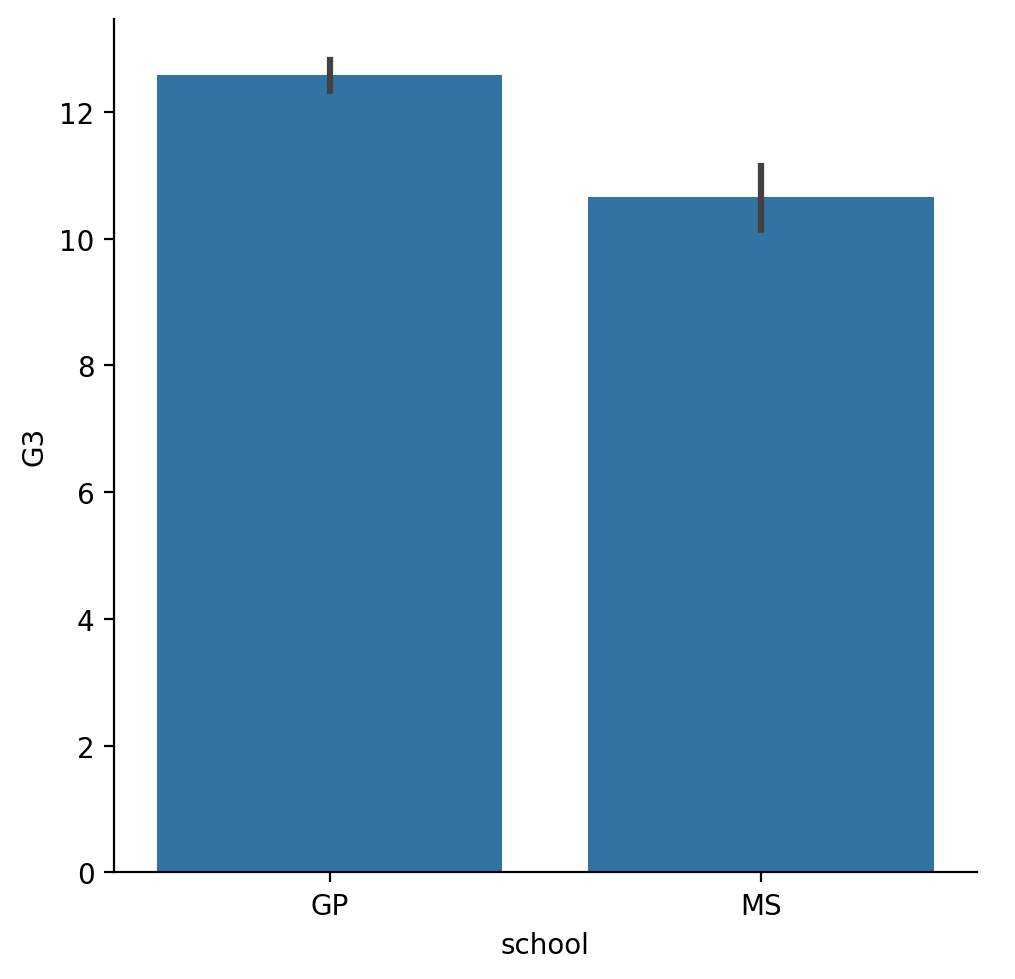

In [41]:
#Plot
sns.catplot(data=df_uci, x='school', y='G3', kind= 'box');
sns.catplot(data=df_uci, x='school', y='G3', kind= 'bar');

# Implot

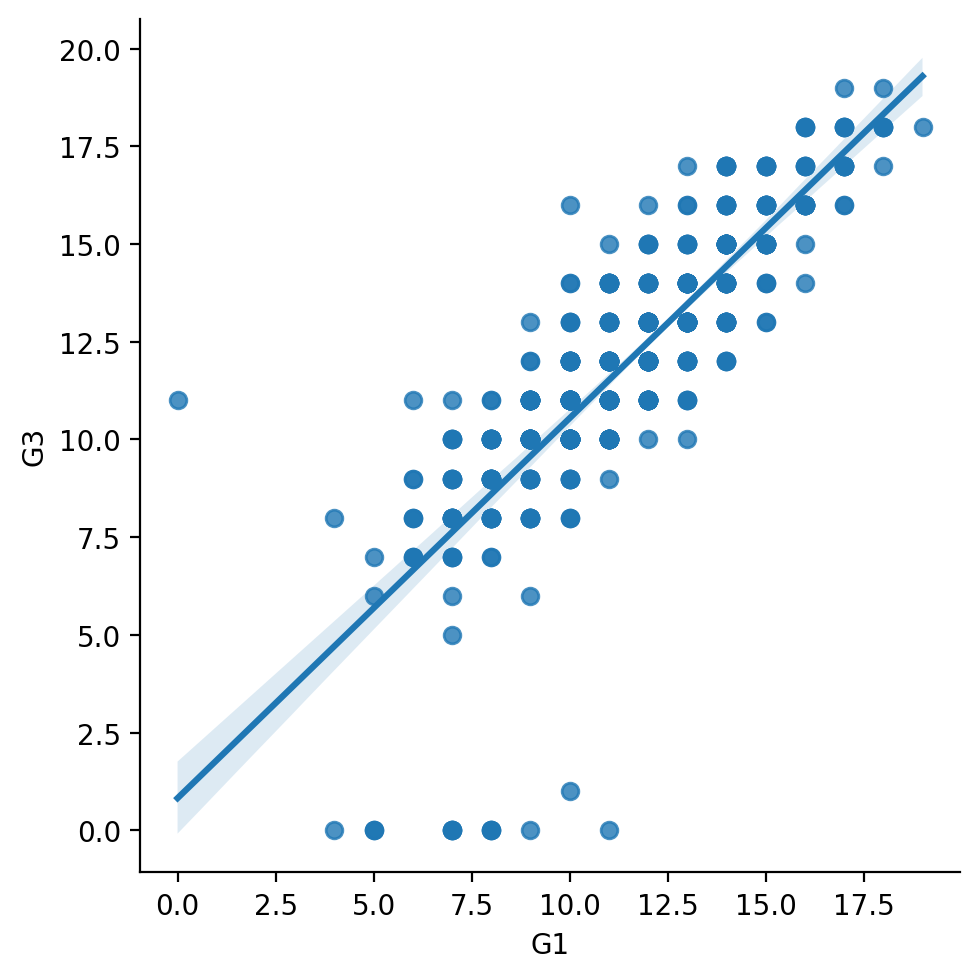

In [45]:
sns.lmplot(data=df_uci, x="G1", y= 'G3')

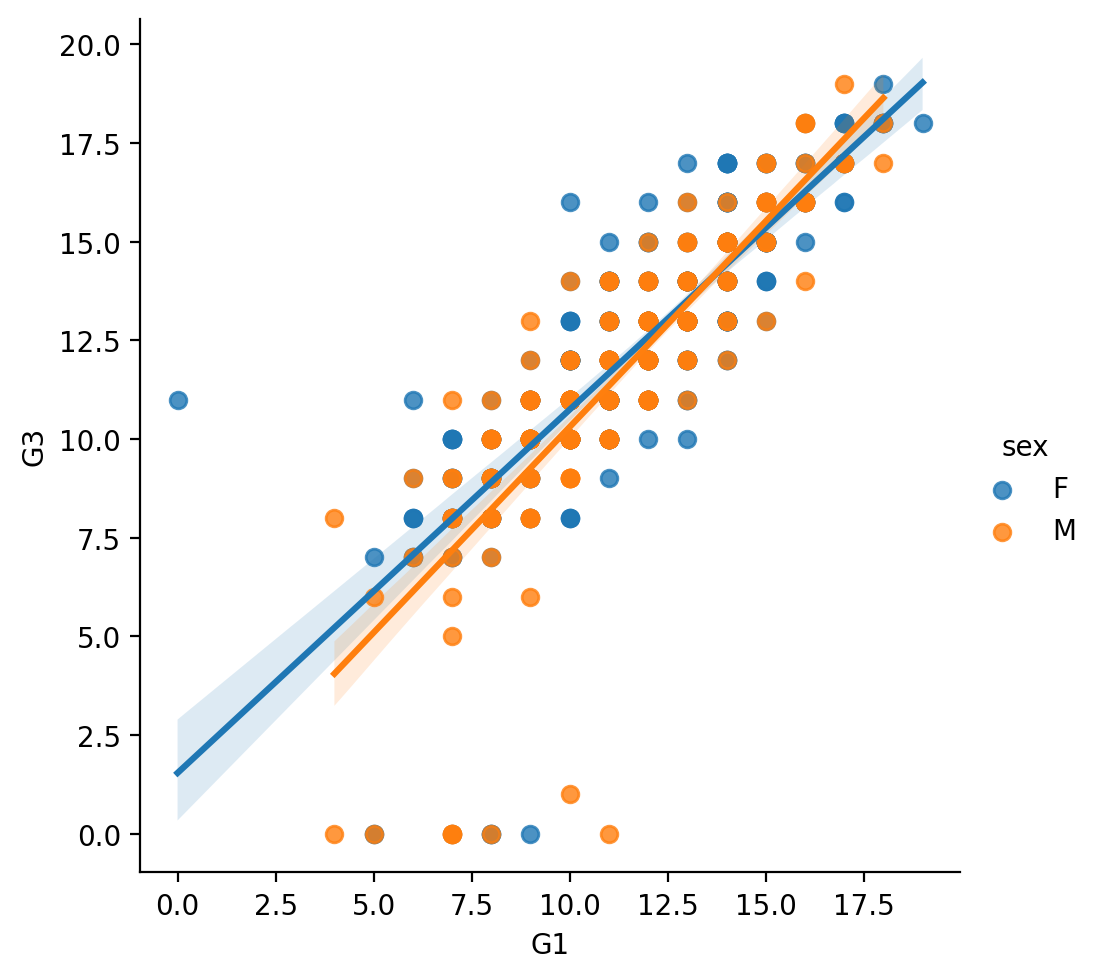

In [47]:
sns.lmplot(data=df_uci, x="G1", y= 'G3', hue='sex')

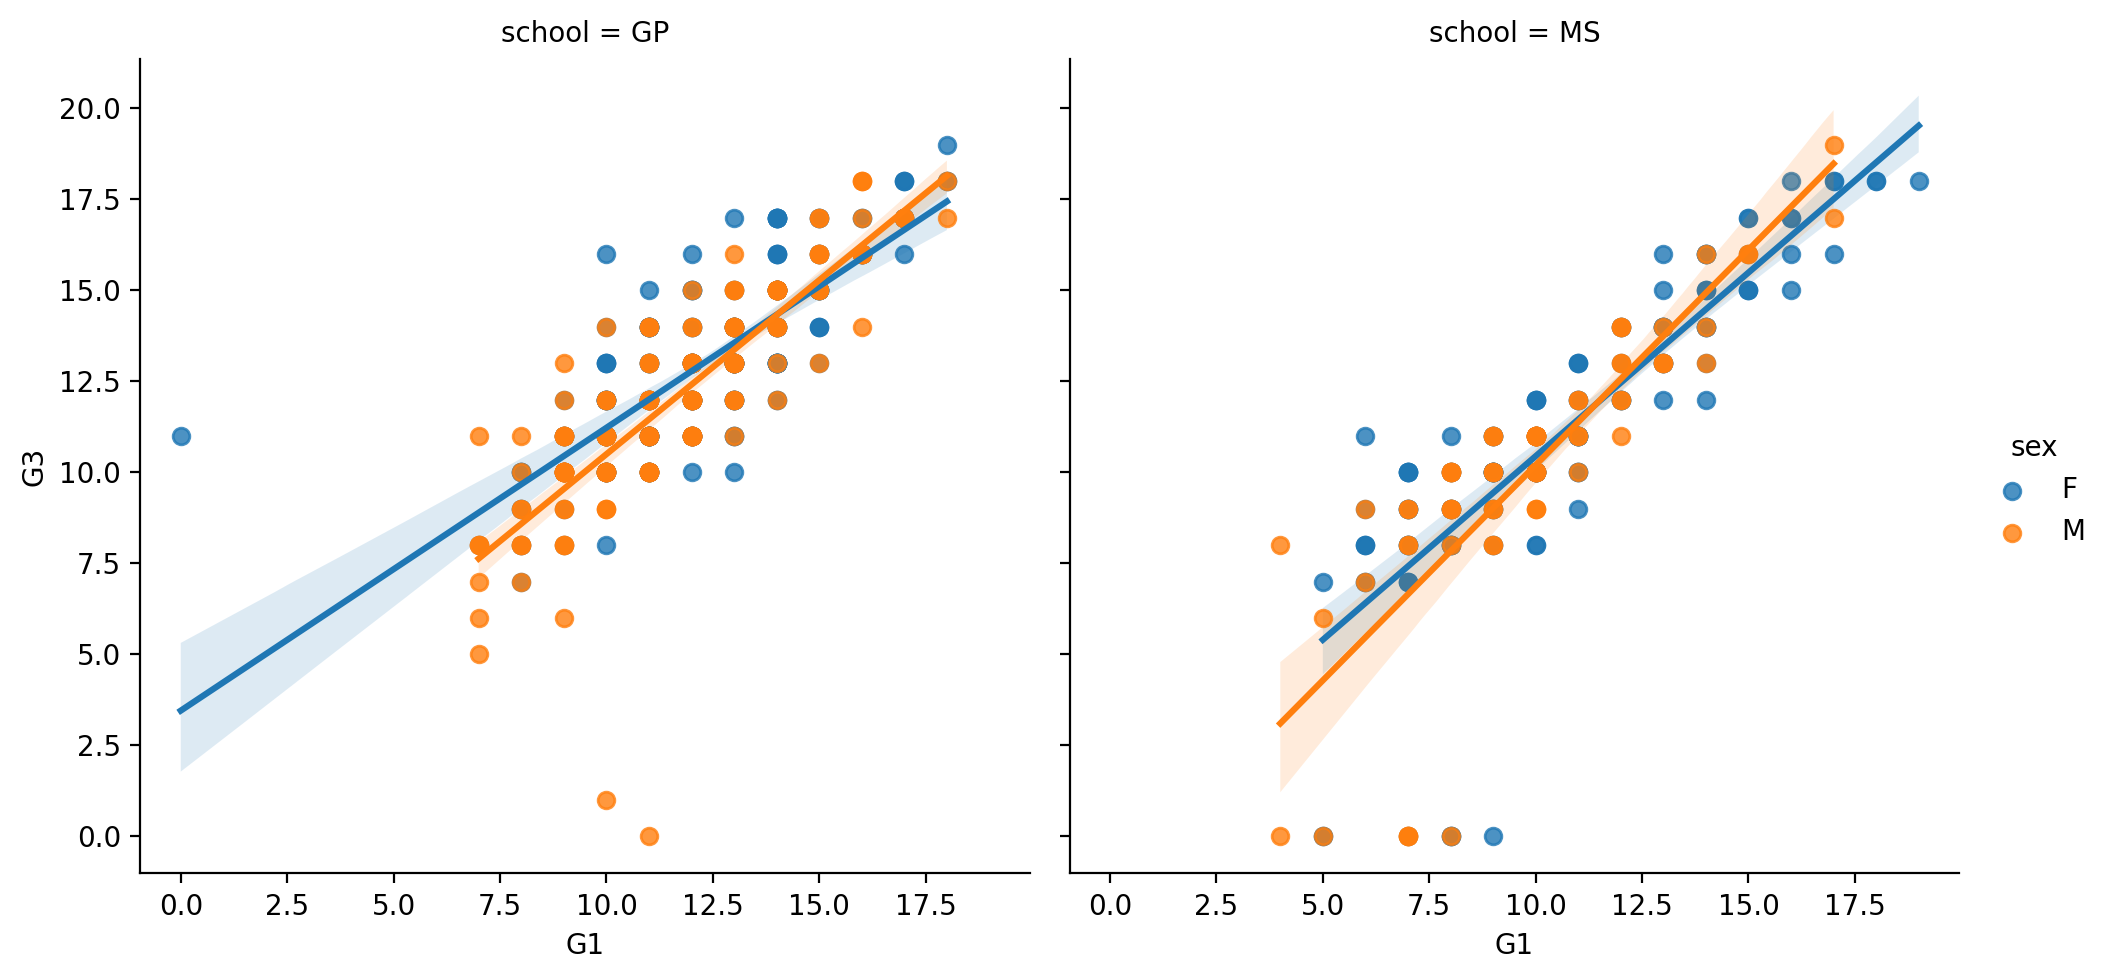

In [48]:
sns.lmplot(data=df_uci, x="G1", y= 'G3', hue='sex', col='school')

# Residplot

<Axes: xlabel='G1', ylabel='G3'>

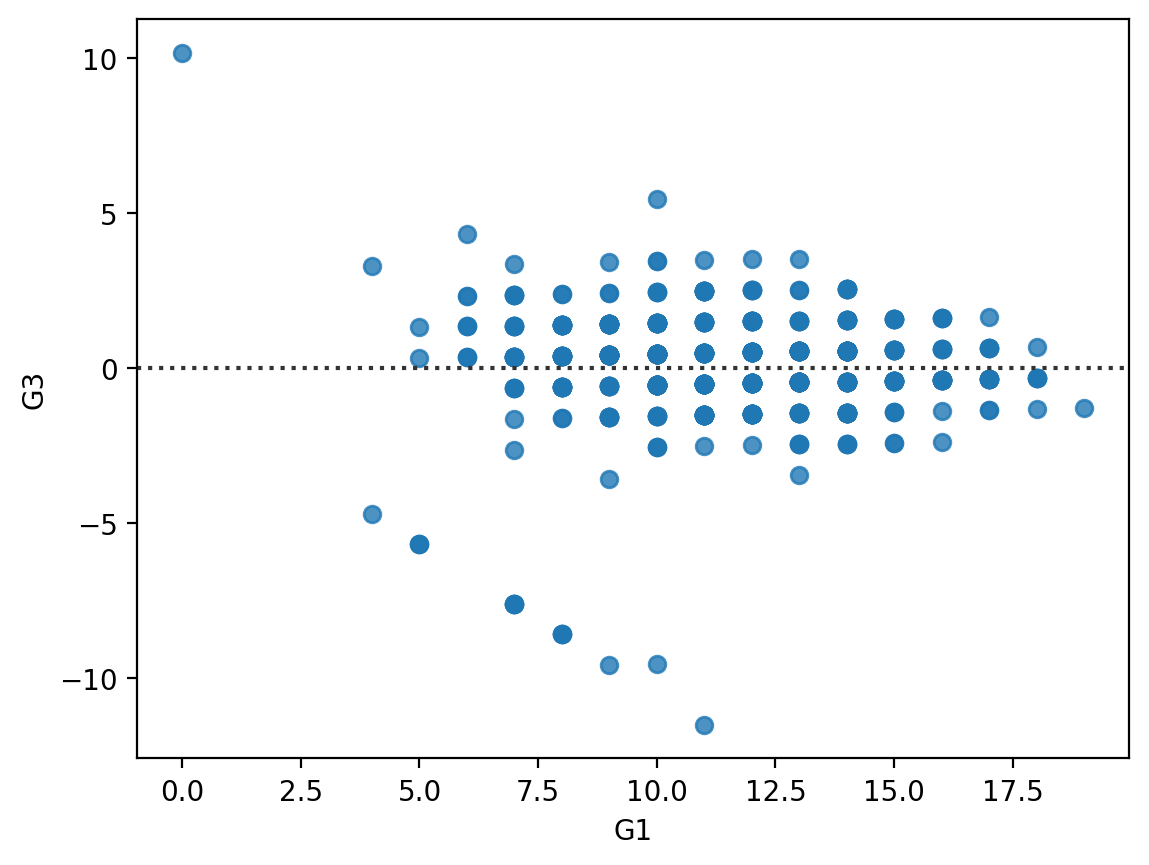

In [49]:
sns.residplot(data=df_uci, x="G1", y= 'G3')